In [ ]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1wMDi6CGCkoBLKwMv1YERVGAIljXzDXxT"})   # ID of file you want to access
downloaded.GetContentFile('data.csv')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime, date, timedelta


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Datetime,feed_flow,product_flow,feed_concentration,product_concentration,feed_temperature,stage_1_feed_pressure,product_pressure,stage_2_feed_pressure,stage_3_feed_pressure,reject_pressure,A,B,k1,k2,k3,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,running_time_since_clean,running_time_since_replace,feed_ph,feed_turbidity
0,2019-06-01 00:01:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.366667,3935.409545,7.890750,NaN
1,2019-06-01 00:02:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.383333,3935.426212,7.947625,NaN
2,2019-06-01 00:03:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.400000,3935.442878,7.890750,NaN
3,2019-06-01 00:04:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.416667,3935.459545,7.914375,NaN
4,2019-06-01 00:05:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.433333,3935.476212,7.914375,NaN


In [ ]:
#df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527039 entries, 0 to 527038
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Datetime                    527039 non-null  object 
 1   feed_flow                   152075 non-null  float64
 2   product_flow                152075 non-null  float64
 3   feed_concentration          152075 non-null  float64
 4   product_concentration       152075 non-null  float64
 5   feed_temperature            152075 non-null  float64
 6   stage_1_feed_pressure       152075 non-null  float64
 7   product_pressure            152075 non-null  float64
 8   stage_2_feed_pressure       152075 non-null  float64
 9   stage_3_feed_pressure       152075 non-null  float64
 10  reject_pressure             152075 non-null  float64
 11  A                           152075 non-null  float64
 12  B                           152075 non-null  float64
 13  k1            

In [ ]:
df.describe()

,feed_flow,product_flow,feed_concentration,product_concentration,feed_temperature,stage_1_feed_pressure,product_pressure,stage_2_feed_pressure,stage_3_feed_pressure,reject_pressure,A,B,k1,k2,k3,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,running_time_since_clean,running_time_since_replace,feed_ph,feed_turbidity
count,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,162963.000000,450493.000000,450493.000000,323218.000000,57847.000000
mean,158.856637,127.173244,207.462287,12.347274,17.049586,12.514286,1.140823,9.599271,7.292033,5.133007,0.003597,0.000732,0.013479,0.010545,0.008176,0.032972,0.800573,411.792775,45.605274,396.366726,5472.112024,7.951497,0.055237
std,4.194192,3.374772,31.081676,1.987631,2.175214,1.388735,0.051323,0.734782,0.528891,0.423518,0.000301,0.000198,0.004253,0.001819,0.001374,0.005099,0.006082,67.755918,34.586714,274.994051,861.741686,0.228412,0.046973
min,119.578968,113.886360,62.302500,2.772000,10.868056,9.080715,0.863403,7.185452,5.497039,3.661245,0.000329,0.000183,0.002272,0.002000,0.000556,0.009196,0.771534,247.788085,0.000000,0.000000,3935.409545,5.001500,0.000000
25%,157.011462,125.669268,208.080000,10.725754,16.090278,11.710300,1.107998,9.261709,7.058756,4.946301,0.003463,0.000577,0.010712,0.009390,0.007544,0.032528,0.796845,362.816867,14.296817,174.283333,4705.184545,7.882875,0.032188
50%,159.608124,127.850868,218.430000,12.570754,16.394097,12.201560,1.133405,9.538371,7.268192,5.116952,0.003660,0.000728,0.011805,0.009862,0.007959,0.034691,0.800407,413.279150,41.039294,358.966667,5423.826212,7.911750,0.048125
75%,161.961156,129.680208,224.910000,13.788000,16.687500,13.284940,1.187664,10.065840,7.653450,5.362586,0.003839,0.000809,0.014937,0.011214,0.008616,0.035960,0.804064,469.776495,78.371174,588.166667,6211.851212,7.970375,0.064687
max,169.294212,136.202292,258.885000,18.661500,25.663200,17.271980,1.886138,12.597170,10.071010,7.780146,0.004249,0.001600,0.038083,0.067401,0.225104,0.042418,1.000000,533.913118,108.666789,1067.925000,6892.226212,14.000000,3.239375


In [ ]:
df['product_flow'].unique()  

array([       nan, 129.043908, 128.282616, ..., 127.947438, 129.600684,
       130.322214])

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values(by ='Datetime' )
df.index = df['Datetime']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527039 entries, 2019-06-01 00:01:00+00:00 to 2020-05-31 23:59:00+00:00
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   Datetime                    527039 non-null  datetime64[ns, UTC]
 1   feed_flow                   152075 non-null  float64            
 2   product_flow                152075 non-null  float64            
 3   feed_concentration          152075 non-null  float64            
 4   product_concentration       152075 non-null  float64            
 5   feed_temperature            152075 non-null  float64            
 6   stage_1_feed_pressure       152075 non-null  float64            
 7   product_pressure            152075 non-null  float64            
 8   stage_2_feed_pressure       152075 non-null  float64            
 9   stage_3_feed_pressure       152075 non-null  float64            
 10

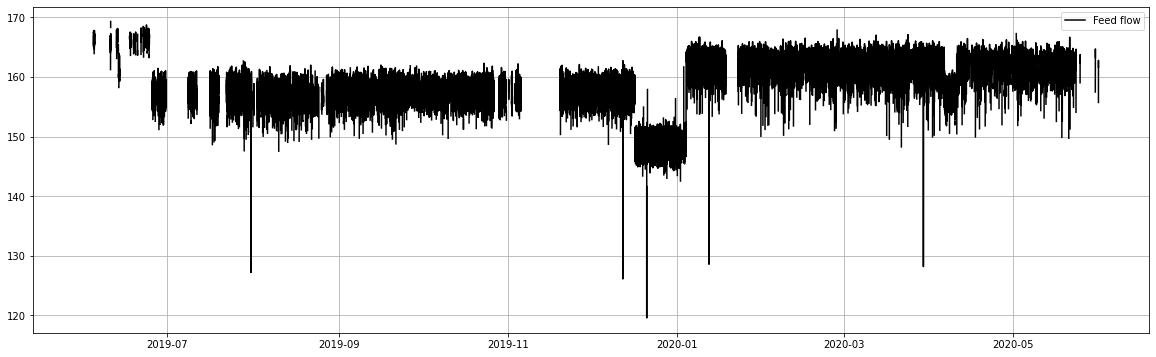

In [ ]:
#Plotting the features to understand the tenporal dependency between the data samples for each feature
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['feed_flow'], color='black', label = 'Feed flow')
plt.legend()
plt.show();

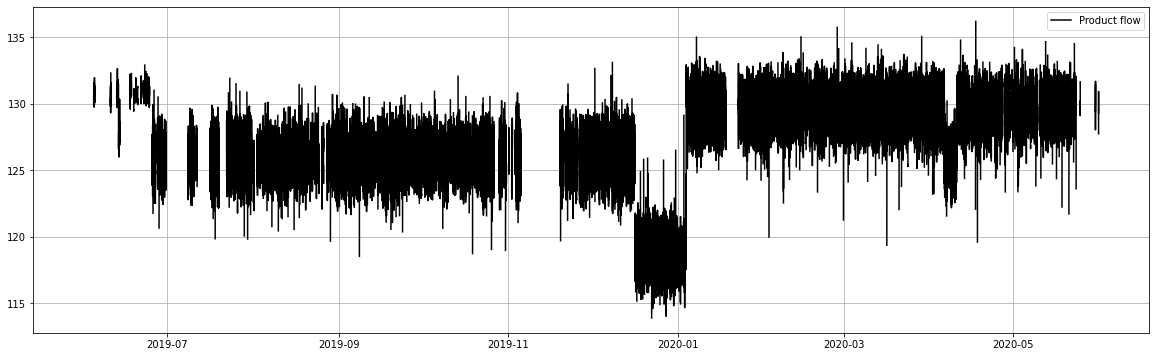

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['product_flow'], color='black', label = 'Product flow')
plt.legend()
plt.show();

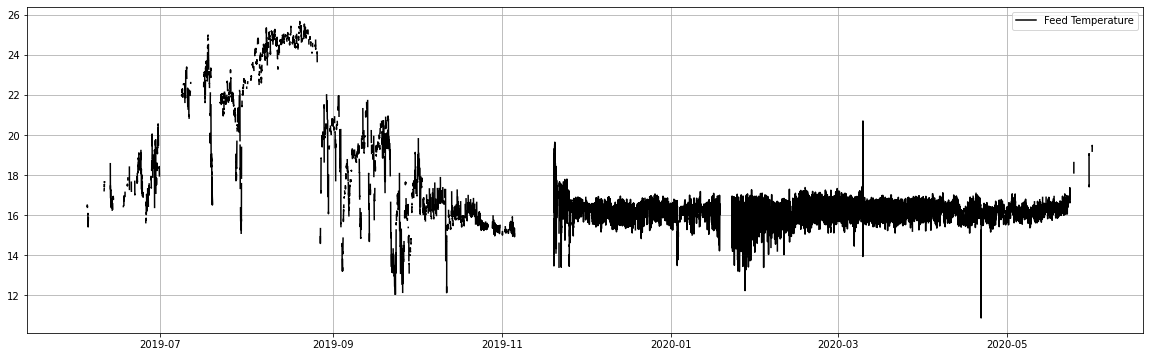

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['feed_temperature'], color='black', label = 'Feed Temperature')
plt.legend()
plt.show();

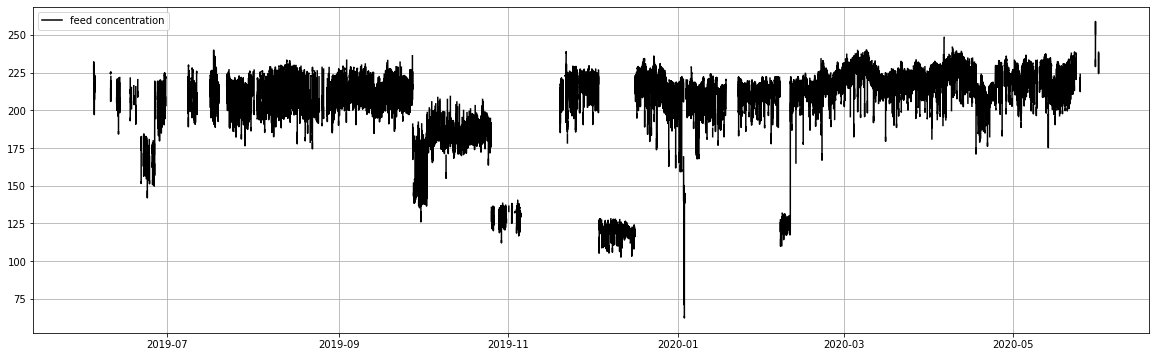

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['feed_concentration'], color='black', label = 'feed concentration')
plt.legend()
plt.show();

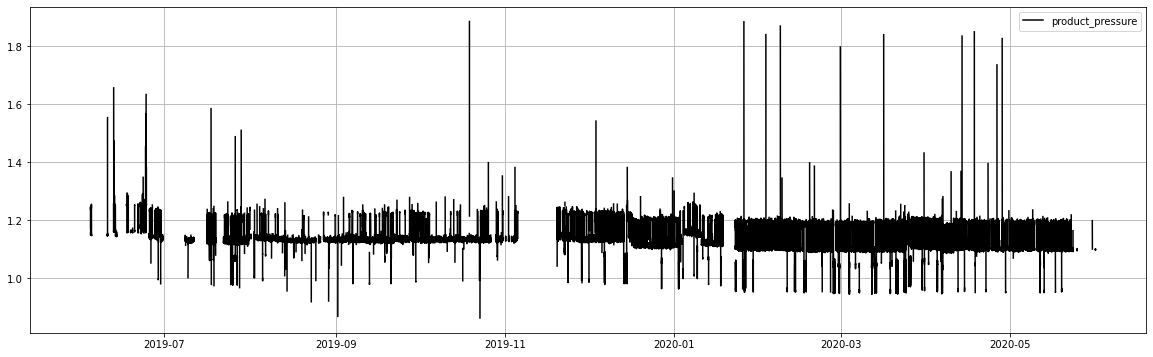

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['product_pressure'], color='black', label = 'product_pressure')
plt.legend()
plt.show();

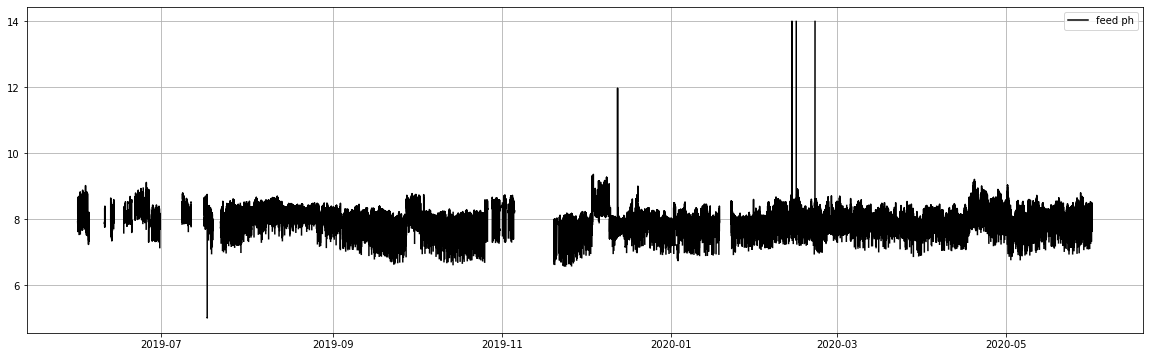

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['feed_ph'], color='black', label = 'feed ph')
plt.legend()
plt.show();

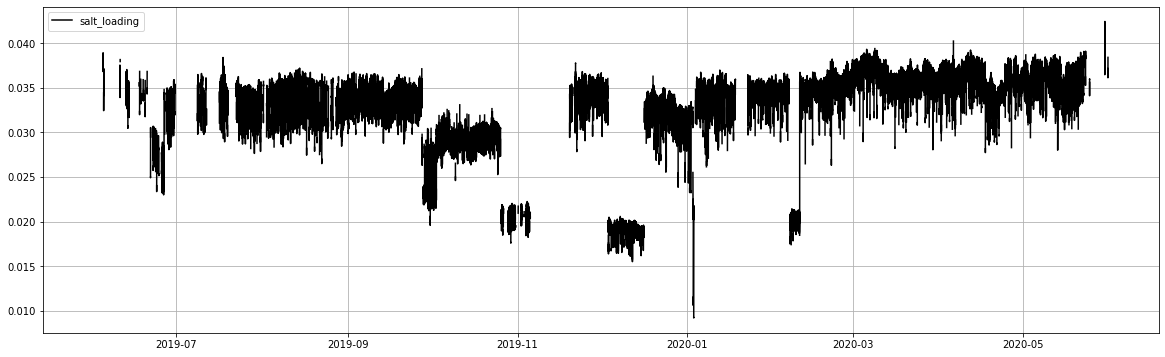

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['salt_loading'], color='black', label = 'salt_loading')
plt.legend()
plt.show();

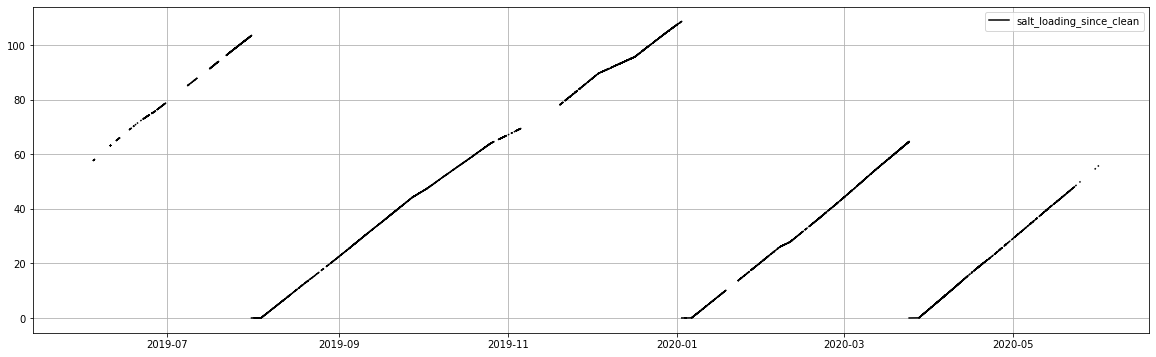

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['salt_loading_since_clean'], color='black', label = 'salt_loading_since_clean')
plt.legend()
plt.show();

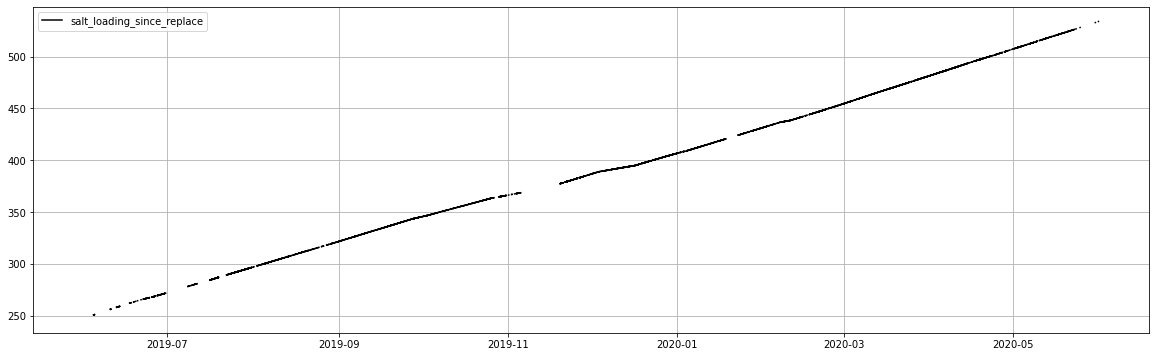

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['salt_loading_since_replace'], color='black', label = 'salt_loading_since_replace')
plt.legend()
plt.show();

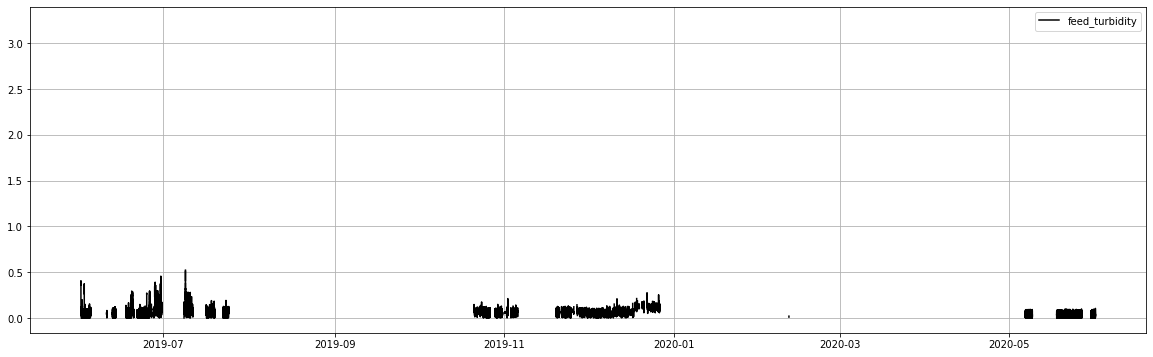

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['feed_turbidity'], color='black', label = 'feed_turbidity')
plt.legend()
plt.show();

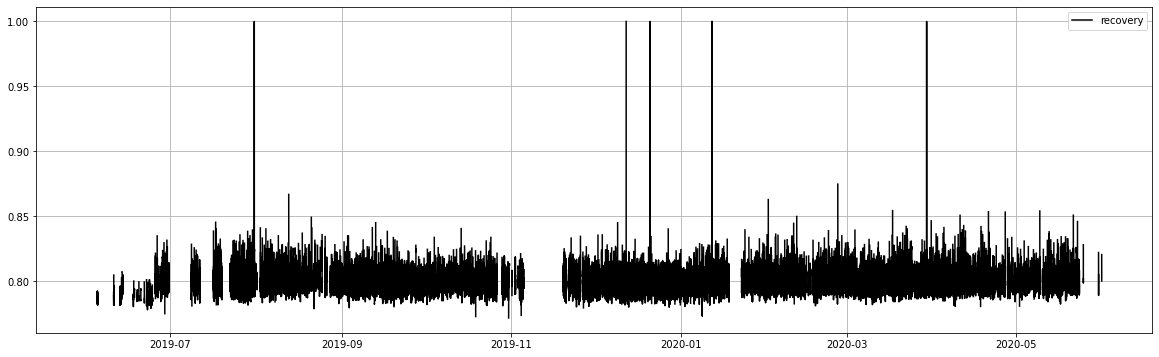

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['recovery'], color='black', label = 'recovery')
plt.legend()
plt.show();

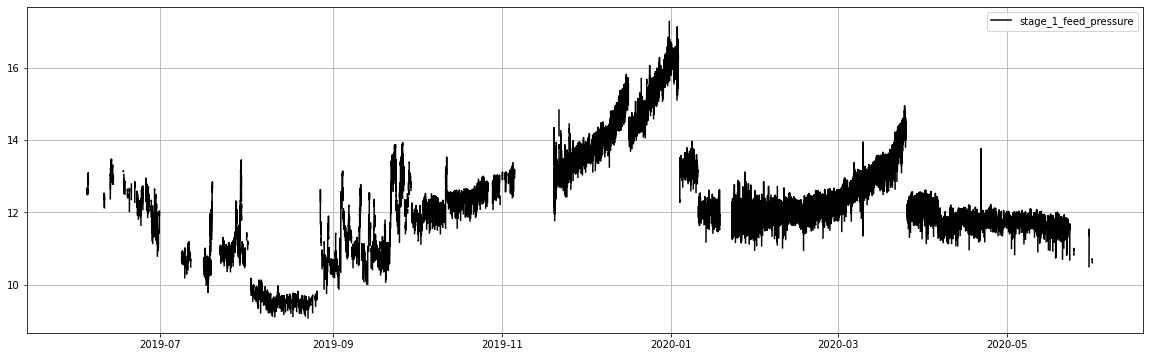

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['stage_1_feed_pressure'], color='black', label = 'stage_1_feed_pressure')
plt.legend()
plt.show();

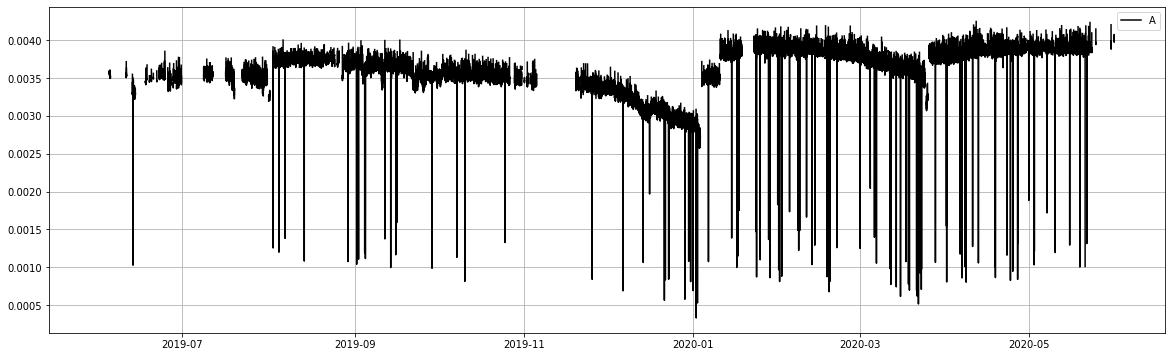

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['A'], color='black', label = 'A')
plt.legend()
plt.show();

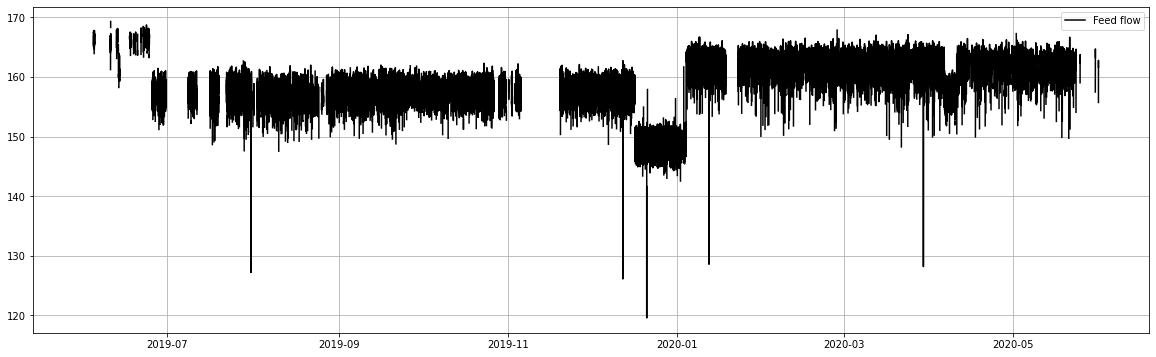

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid()
ax.plot(df['Datetime'], df['feed_flow'], color='black', label = 'Feed flow')
plt.legend()
plt.show();


In [ ]:
# write a function to display the characteristics of each feature in the train data. 
# Output will include shape of the data, type of attribute, total count, number of null values, unique set of values, skewness, kurtosis and correlation with Sales Prices (target variable)

def characteristics(df):
    ob = df.shape[0]
    typ = df.dtypes
    count = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.unique())
    distincts = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x : x.isnull().sum())
    missing_ratio = df.apply(lambda x: ((x.isnull().sum())/ob)*100)
    skewness = df.skew()
    kurtosis = df.kurt()
    corr1 = df.corr()['stage_1_feed_pressure']
    corr2 = df.corr()['A']
    
    cols1= ['type', 'count','uniques','distincts', 'nulls', 'missing_ratio', 'skewness','kurtosis','corr with stage_1_feed_pressure']
    str1 = pd.concat([typ, count,uniques,distincts, nulls, missing_ratio, skewness, kurtosis, corr1], axis=1, sort=False)
    str1.columns = cols1
    
    cols2= ['type', 'count','uniques','distincts', 'nulls', 'missing_ratio', 'skewness','kurtosis','corr with A']
    str2 = pd.concat([typ, count,uniques,distincts, nulls, missing_ratio, skewness, kurtosis, corr2], axis=1, sort=False)
    str2.columns = cols2

    return str1, str2
  
Required_features = df[['feed_flow', 'feed_concentration', 'feed_temperature', 'salt_loading', 'recovery', 'salt_loading_since_replace', 'salt_loading_since_clean', 'feed_ph', 'feed_turbidity', 'stage_1_feed_pressure','A']]
details1, details2 = characteristics(Required_features)




In [ ]:
# Displaying the features based on using correlation values of each input feature with respect to the target
details1.sort_values(by='corr with stage_1_feed_pressure', ascending=False, inplace = True)
details1.head(15)


,type,count,uniques,distincts,nulls,missing_ratio,skewness,kurtosis,corr with stage_1_feed_pressure
stage_1_feed_pressure,float64,152075,"[nan, 12.26879, 12.58941, 12.74713, 12.69025, ...",5126,374964,71.145399,0.502818,0.264975,1.000000
salt_loading_since_clean,float64,162963,"[nan, 54.78563877058855, 55.164555229170894, 5...",148063,364076,69.079518,0.299482,-1.218057,0.594522
feed_turbidity,float64,57847,"[nan, 0.358125, 0.4065625, 0.3378125, 0.274687...",954,469192,89.024152,21.018431,940.621199,0.245435
salt_loading_since_replace,float64,152075,"[nan, 247.78808477245465, 248.16700123103698, ...",152076,374964,71.145399,-0.348293,-0.830130,0.149585
feed_ph,float64,323218,"[7.89075, 7.947625, 7.914375, 7.917875, 7.9187...",4790,203821,38.672850,7.258807,187.478285,-0.051657
recovery,float64,152075,"[nan, 0.8171696325150507, 0.811181880038435, 0...",120997,374964,71.145399,2.540030,70.329904,-0.074341
feed_concentration,float64,152075,"[nan, 221.895, 225.585, 231.075, 222.66, 230.4...",3730,374964,71.145399,-1.972543,2.680226,-0.315488
salt_loading,float64,152075,"[nan, 0.035040702476339995, 0.0356746552684199...",145140,374964,71.145399,-1.823321,2.292241,-0.380413
feed_flow,float64,152075,"[nan, 157.91569200000004, 158.14285199999995, ...",105518,374964,71.145399,-1.194723,1.324107,-0.437724
feed_temperature,float64,152075,"[nan, 15.555555555555555, 15.069444444444445, ...",4882,374964,71.145399,2.213098,4.455668,-0.595268




#### Analyzing the significance/impact of input features on the target/response variable 'stage_1_feed_pressure' :

1. The results above shows that the target 'stage_1_feed_pressure' has the highest correlation with 'salt_loading_since _clean' and 'feed_temperature' feature amongst all the features. 

2. It is positively associated with 'salt_loading_since _clean' with correlation value being 0.59, and negatively associated with 'feed_temperature' (-0.59). 

2. 'feed_temperature' has negatve relationship with the target. This explains the fact that when the temperature of the input salty water/feed increases, the molecules expand increasing the volume and with increasing pressure, the fresh water permeates through membrane which will have low pressure. (Example: steam inside a high pressure cooker escapes outside (atmosphere with low pressure) when temperature increases)

3. These two features are more statistically significant to the change in the response variable 'stage_1_feed_pressure', followed by feed_flow and salt_loading which are the next relevant features with a negative correlation of -0.43 and -0.38 respectively.


#### Therefore, if we are modeling for 'stage_1_feed_pressure' response variable then the following features - feed_temperature, salt_loading_since_clean, feed_flow, salt_loading could be considered for the multivariate time-series forecasting.

# 


In [ ]:
details2.sort_values(by='corr with A', ascending=False, inplace = True)
details2.head(15)



,type,count,uniques,distincts,nulls,missing_ratio,skewness,kurtosis,corr with A
A,float64,152075,"[nan, 0.0037621809416642773, 0.003691609072678...",151928,374964,71.145399,-1.235777,3.349499,1.000000
feed_flow,float64,152075,"[nan, 157.91569200000004, 158.14285199999995, ...",105518,374964,71.145399,-1.194723,1.324107,0.741359
salt_loading,float64,152075,"[nan, 0.035040702476339995, 0.0356746552684199...",145140,374964,71.145399,-1.823321,2.292241,0.477919
salt_loading_since_replace,float64,152075,"[nan, 247.78808477245465, 248.16700123103698, ...",152076,374964,71.145399,-0.348293,-0.830130,0.389957
feed_concentration,float64,152075,"[nan, 221.895, 225.585, 231.075, 222.66, 230.4...",3730,374964,71.145399,-1.972543,2.680226,0.360370
recovery,float64,152075,"[nan, 0.8171696325150507, 0.811181880038435, 0...",120997,374964,71.145399,2.540030,70.329904,0.130123
feed_temperature,float64,152075,"[nan, 15.555555555555555, 15.069444444444445, ...",4882,374964,71.145399,2.213098,4.455668,0.056954
feed_ph,float64,323218,"[7.89075, 7.947625, 7.914375, 7.917875, 7.9187...",4790,203821,38.672850,7.258807,187.478285,0.002985
feed_turbidity,float64,57847,"[nan, 0.358125, 0.4065625, 0.3378125, 0.274687...",954,469192,89.024152,21.018431,940.621199,-0.410297
salt_loading_since_clean,float64,162963,"[nan, 54.78563877058855, 55.164555229170894, 5...",148063,364076,69.079518,0.299482,-1.218057,-0.756751


#### Analyzing the significance/impact of input features on the target/response variable 'A' :

1. The results above shows that the target 'A' has the highest positive correlation with 'feed_flow' with a correlation value being 0.74 and highest negative association with 'salt_loading_since_clean'(-0.75).

2. Next relevant features based on the order of correlation values are salt_loading, feed_turbidity, salt_loading_since_replace, feed_concentration. 

3. Strangely, the 'feed_temperature' is having a correlation value closer to '0' indicating that it doesn't have much impact on the target 'A'


#### Therefore, if we are building a model for 'A' response variable then the following features - feed_flow, salt_loading_since_clean,  salt_loading, feed_turbidity, salt_loading_since_replace, feed_concentration could be considered for the multivariate time-series forecasting.


# 


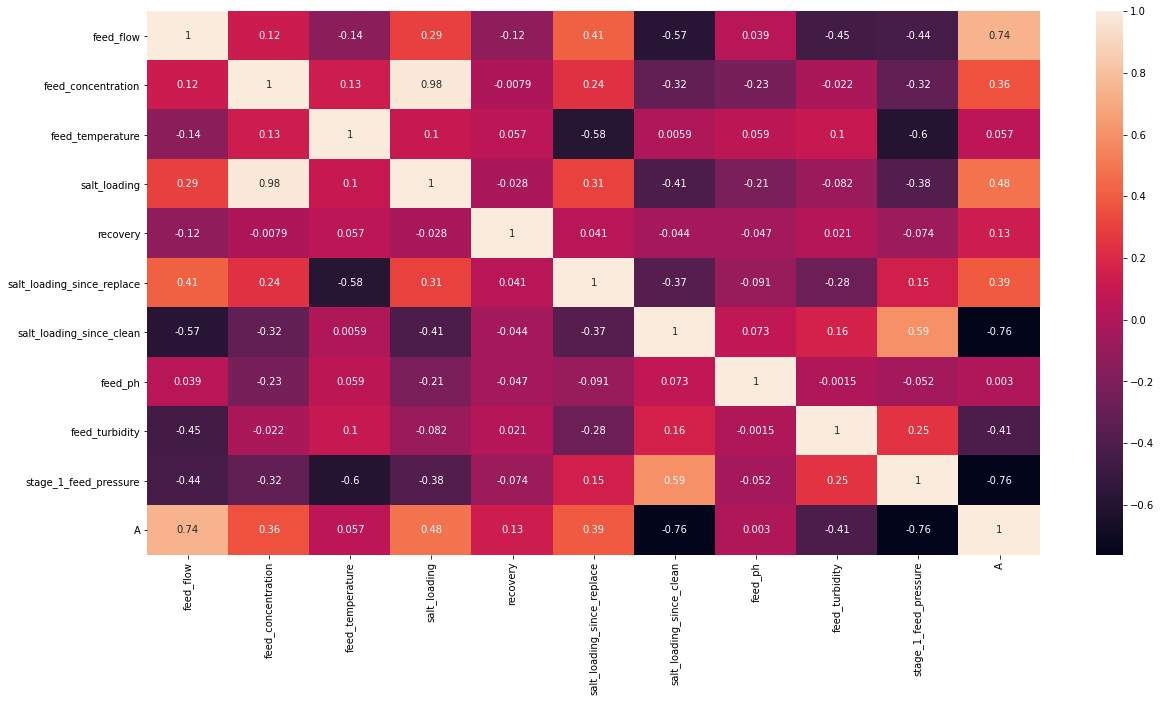

In [ ]:
#Correlation analysis between all the feature variables
plt.figure(figsize=(20,10))
sns.heatmap(Required_features.corr(), annot= True)
plt.show()

#### From the above the heatmap, let's check the correlation between the input features. (We already analyzed correlation between input features and the target variable(s)).


1. feed flow - is slightly correlated for salt_loading_since_clean(-0.57 which is still not much), salt_loading_since_Replace (0.41), feed_turbidity(-0.45)

2. feed_concentration - is highly correlated with salt_loading(0.98) which is quite obvious from the fact that salt_loading is calulated from feed concentration, i.e., salt_loading = feed_flow * feed_concentration. However, based on the correlation matrix salt_loading isn't much associated with feed_flow. Hence, to avoid multi-collinearity we can either select the feature feed_concentration or salt_loading.

3. feed temperature isn't much associated with any feature except for 'salt_loading_since_replace' (-0.58 still low)

4. salt_loading high association with only feed_concentration (already discussed in point 2) and salt_loading_since_clean ( -0.41 low)

5. recovery - none

6. salt_loading_since_replace - with feed_temperature and feed_flow (discussed in point 1 & 3 - still low)

7. salt_loading_since_clean - with salt_loading and feed_flow (as discussed in point 1 &s 4)

8. feed_ph - None

9. feed_turbidity - with feed_flow( -0.41)



#### 1. Based on the above correlation analysis between input & target  and between all the input features, we consider features : feed_flow, salt_loading, feed_temperature, salt_loading_since_clean, salt_loading_since_replace as most relevant features, followed by feed_turbidity, recovery which as well might be taken into consideration for model building. 

#### 2. To avoid multi-collinearity, we will not use 'feed_concentration' as it is highly correlated with salt_loading and it also doesn't have much impact on the response variable as well.

#### 3. feed_ph doesn't have much impact on the response variable as well, so we can ignore this as well.


# 

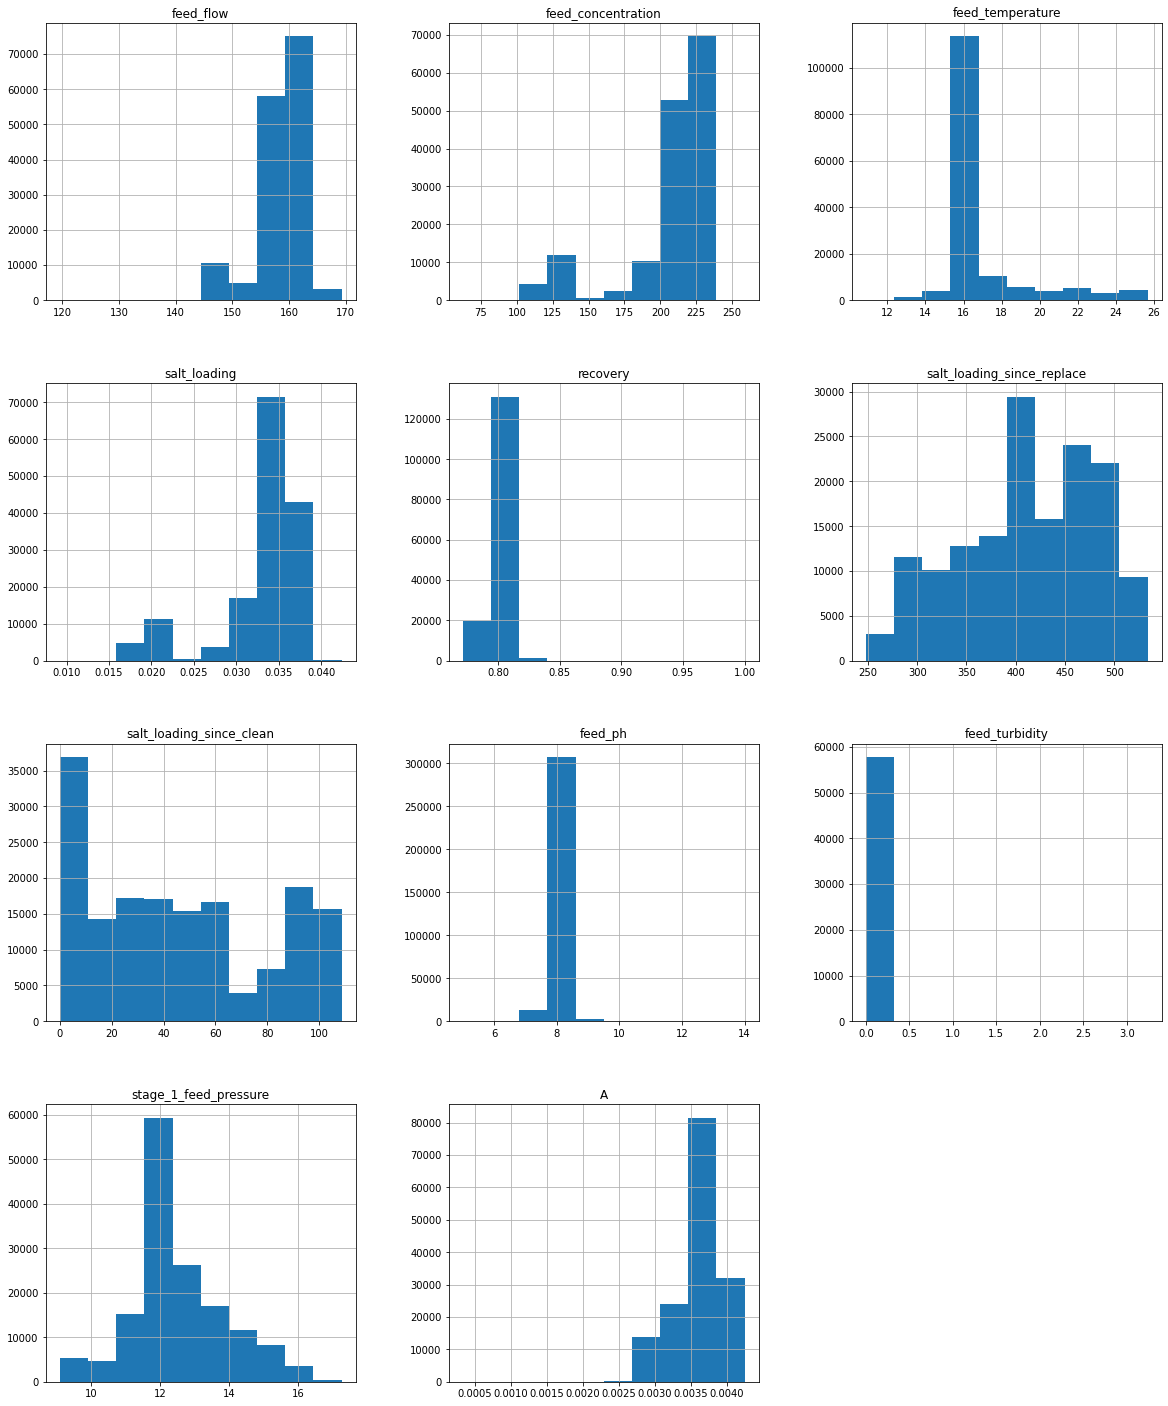

In [ ]:
# Checking the Distribution of features
Required_features.hist(figsize=(20,25))
plt.show()

#### Based on the above statistical distribution, 

1. feed_flow - The average feed flow is 159 cubic meter per hour. During most of the times, it's around 155-165 m3/h.
2. feed_temperature - The average temperature of the feed is 16 Celsius
3. salt_loading - The average is 0.032 kg/hr


In [ ]:
Required_features.describe()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,feed_ph,feed_turbidity,stage_1_feed_pressure,A
count,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,152075.000000,162963.000000,323218.000000,57847.000000,152075.000000,152075.000000
mean,158.856637,207.462287,17.049586,0.032972,0.800573,411.792775,45.605274,7.951497,0.055237,12.514286,0.003597
std,4.194192,31.081676,2.175214,0.005099,0.006082,67.755918,34.586714,0.228412,0.046973,1.388735,0.000301
min,119.578968,62.302500,10.868056,0.009196,0.771534,247.788085,0.000000,5.001500,0.000000,9.080715,0.000329
25%,157.011462,208.080000,16.090278,0.032528,0.796845,362.816867,14.296817,7.882875,0.032188,11.710300,0.003463
50%,159.608124,218.430000,16.394097,0.034691,0.800407,413.279150,41.039294,7.911750,0.048125,12.201560,0.003660
75%,161.961156,224.910000,16.687500,0.035960,0.804064,469.776495,78.371174,7.970375,0.064687,13.284940,0.003839
max,169.294212,258.885000,25.663200,0.042418,1.000000,533.913118,108.666789,14.000000,3.239375,17.271980,0.004249


#### Notice that we have done any data cleaning since this is a time-series data. The data samples have temporal dependency between each other and hence, the ordering/sequence of data points has to be maintained. Hence, we cannot delete or discard the rows which has Null values or are empty.

In [ ]:
features = df[['Datetime','feed_flow', 'product_flow', 'stage_1_feed_pressure', 'A','salt_loading', 'feed_temperature','feed_concentration','feed_turbidity' ]]
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 527039 entries, 2019-06-01 00:01:00+00:00 to 2020-05-31 23:59:00+00:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   Datetime               527039 non-null  datetime64[ns, UTC]
 1   feed_flow              152075 non-null  float64            
 2   product_flow           152075 non-null  float64            
 3   stage_1_feed_pressure  152075 non-null  float64            
 4   A                      152075 non-null  float64            
 5   salt_loading           152075 non-null  float64            
 6   feed_temperature       152075 non-null  float64            
 7   feed_concentration     152075 non-null  float64            
 8   feed_turbidity         57847 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 40.2 MB


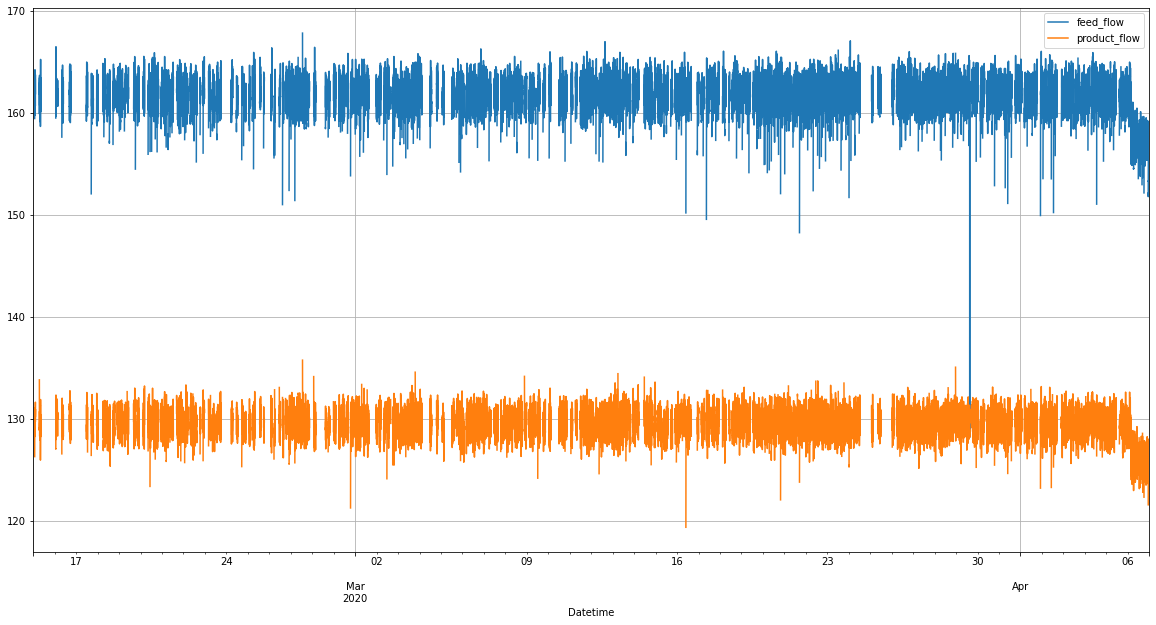

In [ ]:
features.loc['2020-02-15 00:00:00' : '2020-04-07 00:00:00', ['feed_flow','product_flow']].plot(figsize=(20,10)).grid()

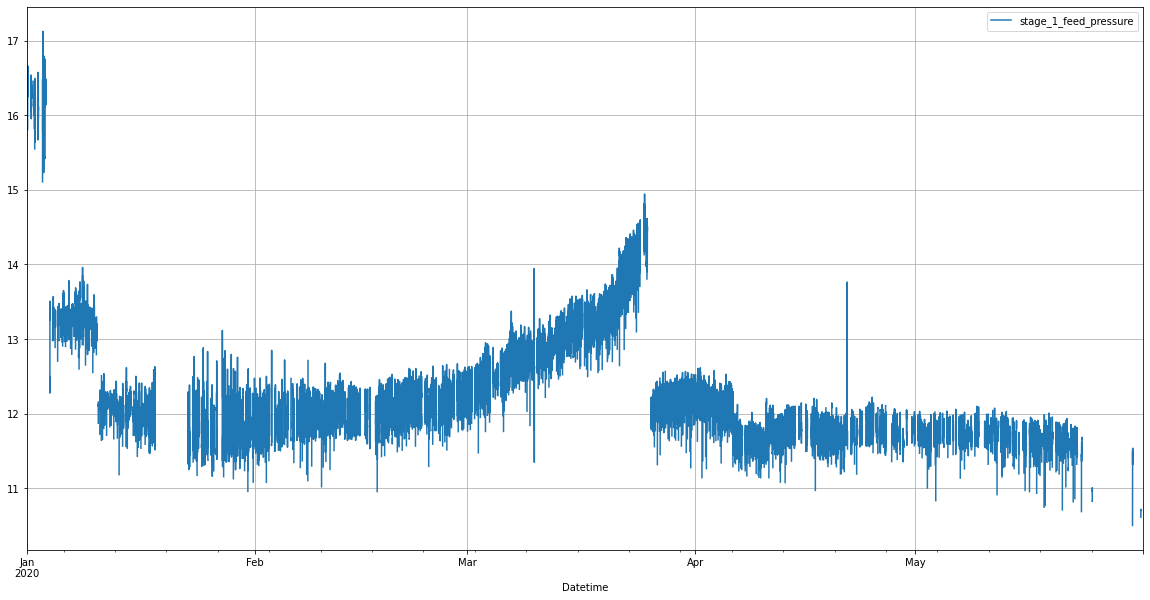

In [ ]:
features.loc['2020-01-01 00:00:00' : '2020-06-30 00:00:00', ['stage_1_feed_pressure']].plot(figsize=(20,10)).grid()

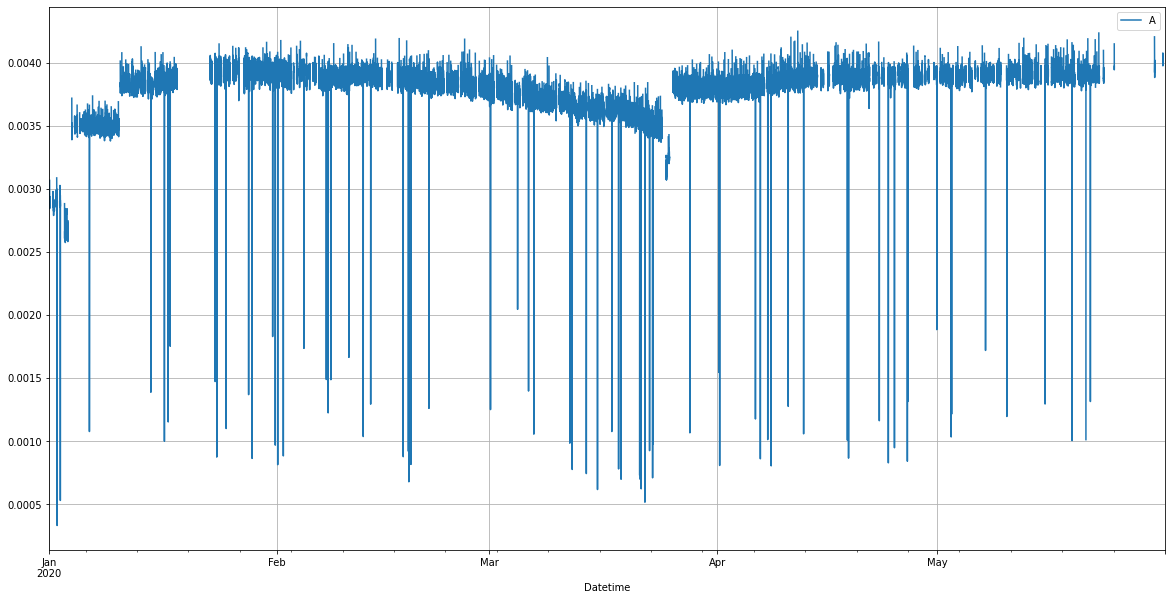

In [ ]:
features.loc['2020-01-01 00:00:00' : '2020-06-30 00:00:00', ['A']].plot(figsize=(20,10)).grid()

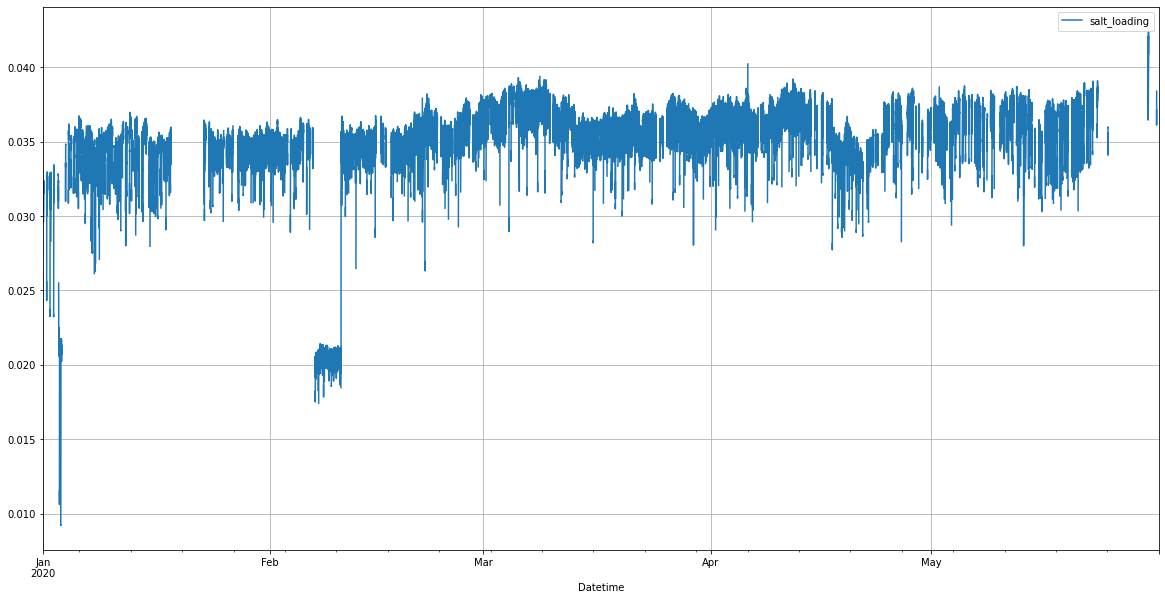

In [ ]:
features.loc['2020-01-01 00:00:00' : '2020-06-30 00:00:00', ['salt_loading']].plot(figsize=(20,10)).grid()

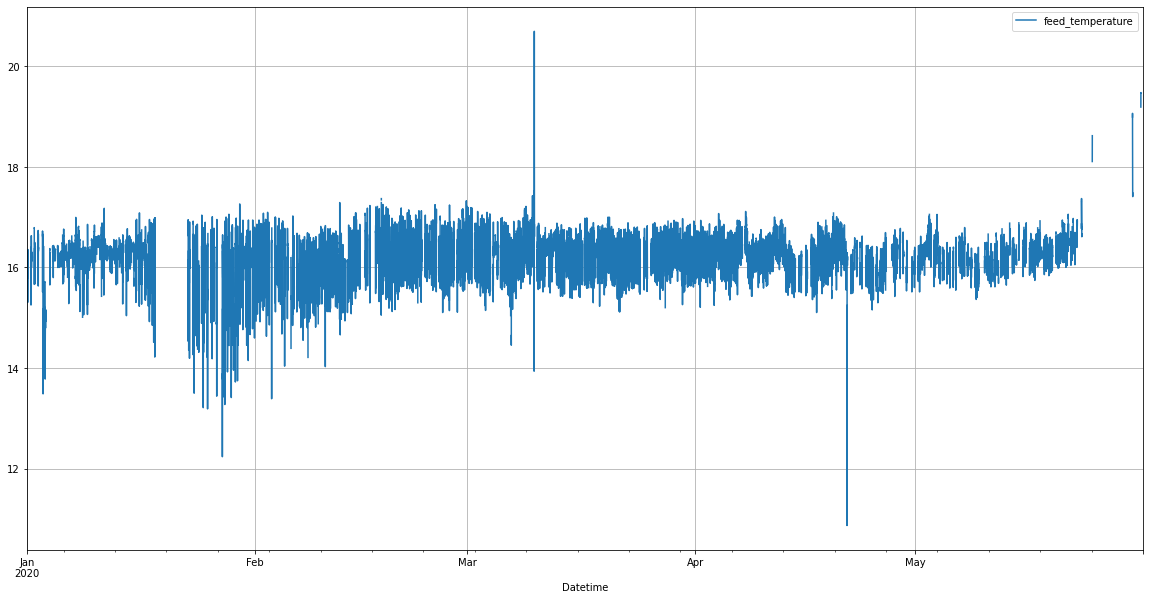

In [ ]:
features.loc['2020-01-01 00:00:00' : '2020-06-30 00:00:00', ['feed_temperature']].plot(figsize=(20,10)).grid()

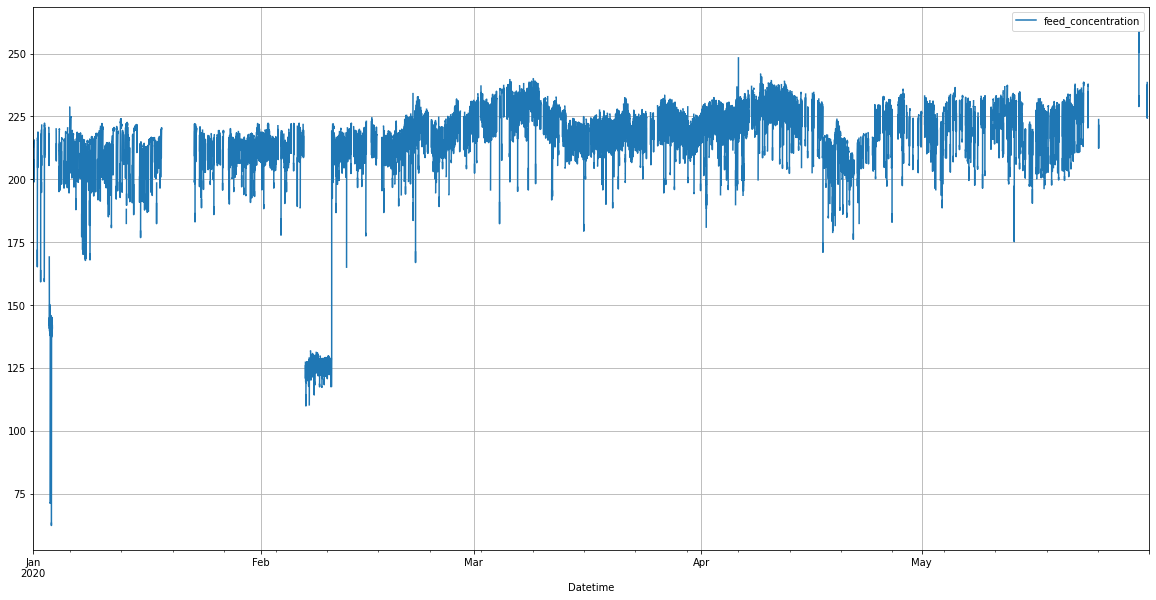

In [ ]:
features.loc['2020-01-01 00:00:00' : '2020-06-30 00:00:00', ['feed_concentration']].plot(figsize=(20,10)).grid()

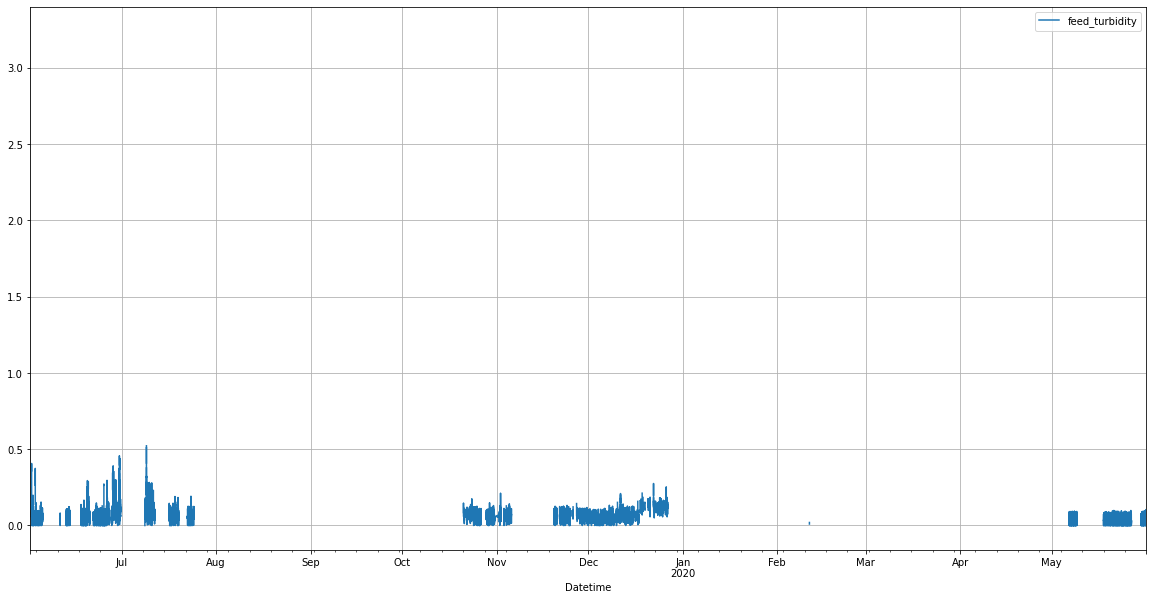

In [ ]:
features.loc['2019-06-01 00:00:00' : '2020-06-30 00:00:00', ['feed_turbidity']].plot(figsize=(20,10)).grid()

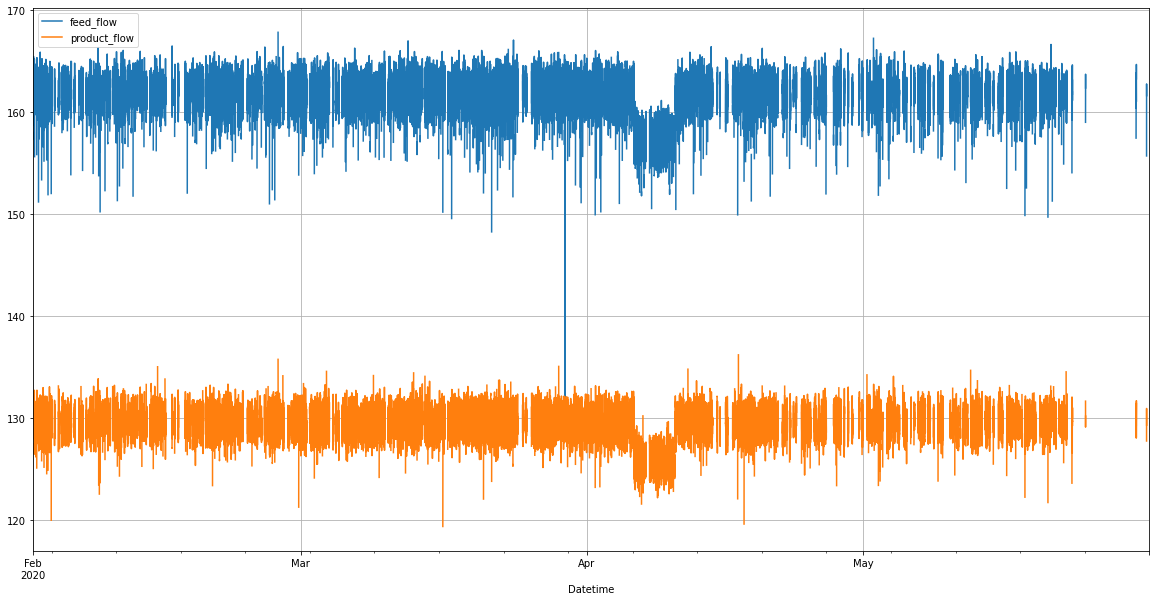

In [ ]:
features.loc['2020-02-01 00:00:00' : '2020-06-30 00:00:00', ['feed_flow','product_flow']].plot(figsize=(20,10)).grid()

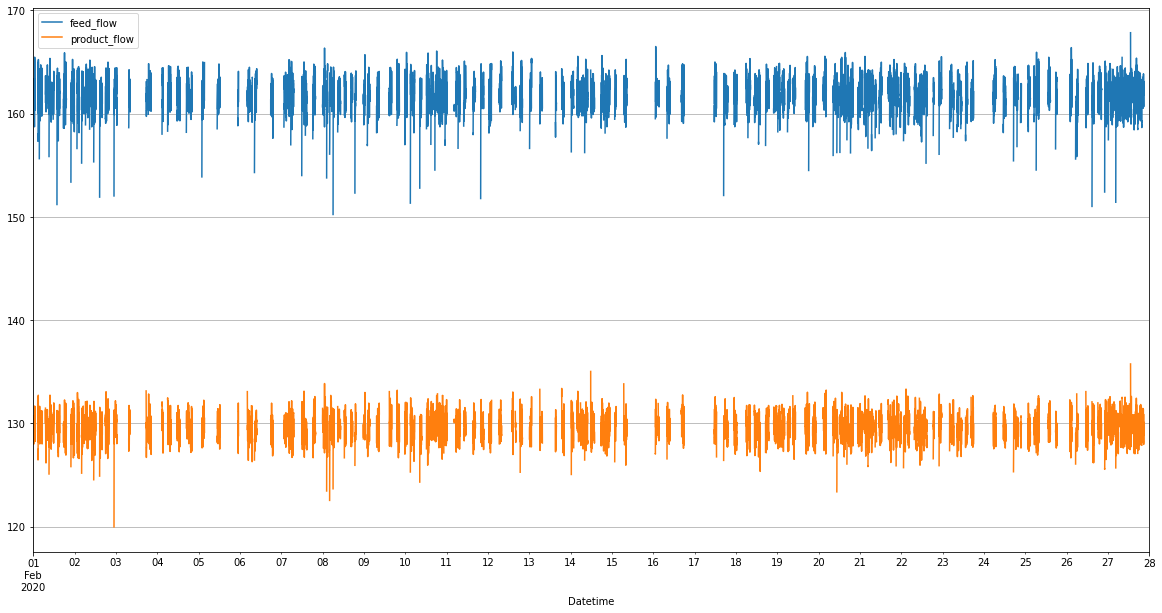

In [ ]:
features.loc['2020-02-01 00:00:00' : '2020-02-28 00:00:00', ['feed_flow','product_flow']].plot(figsize=(20,10)).grid()

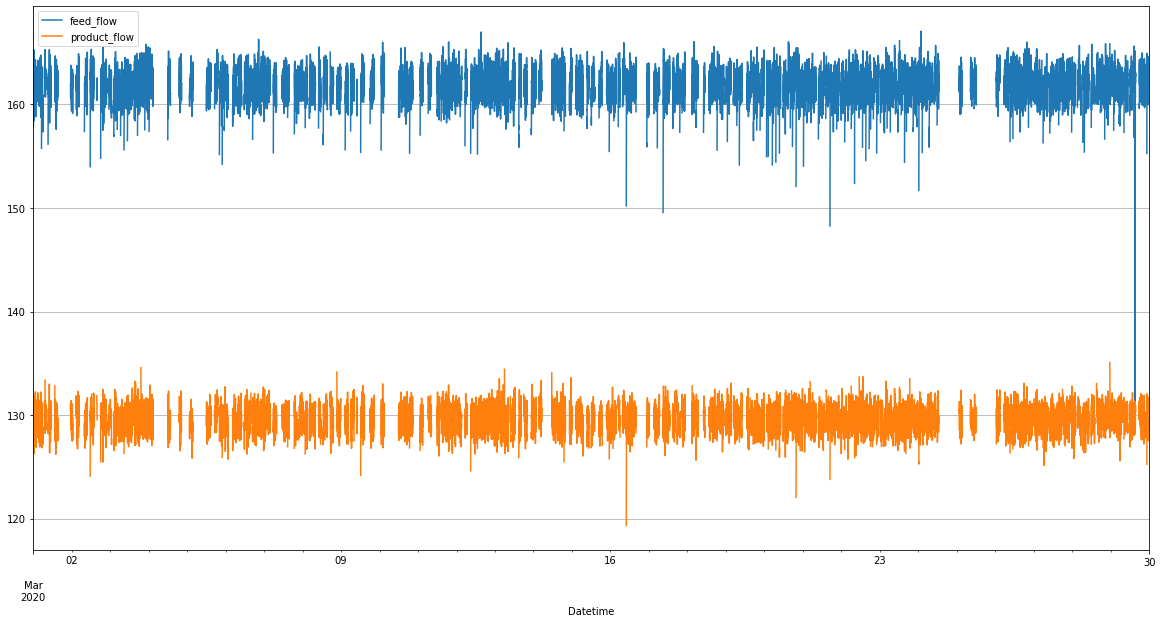

In [ ]:
features.loc['2020-03-01 00:00:00' : '2020-03-30 00:00:00', ['feed_flow','product_flow']].plot(figsize=(20,10)).grid()

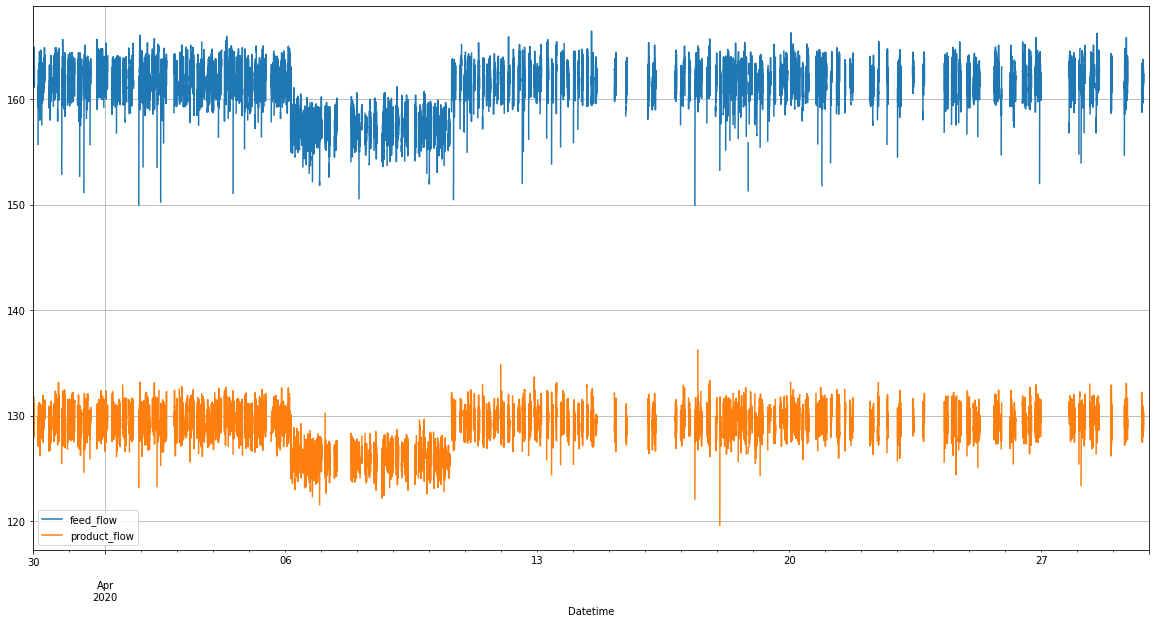

In [ ]:
features.loc['2020-03-30 00:00:00' : '2020-04-30 00:00:00', ['feed_flow','product_flow']].plot(figsize=(20,10)).grid()

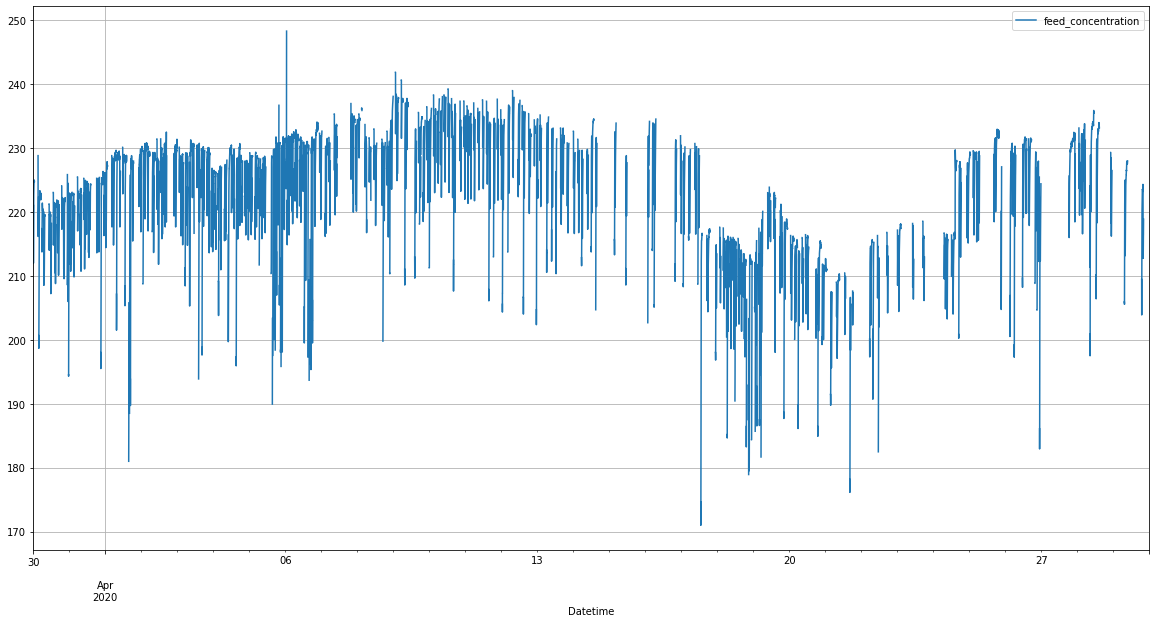

In [ ]:
features.loc['2020-03-30 00:00:00' : '2020-04-30 00:00:00', ['feed_concentration']].plot(figsize=(20,10)).grid()

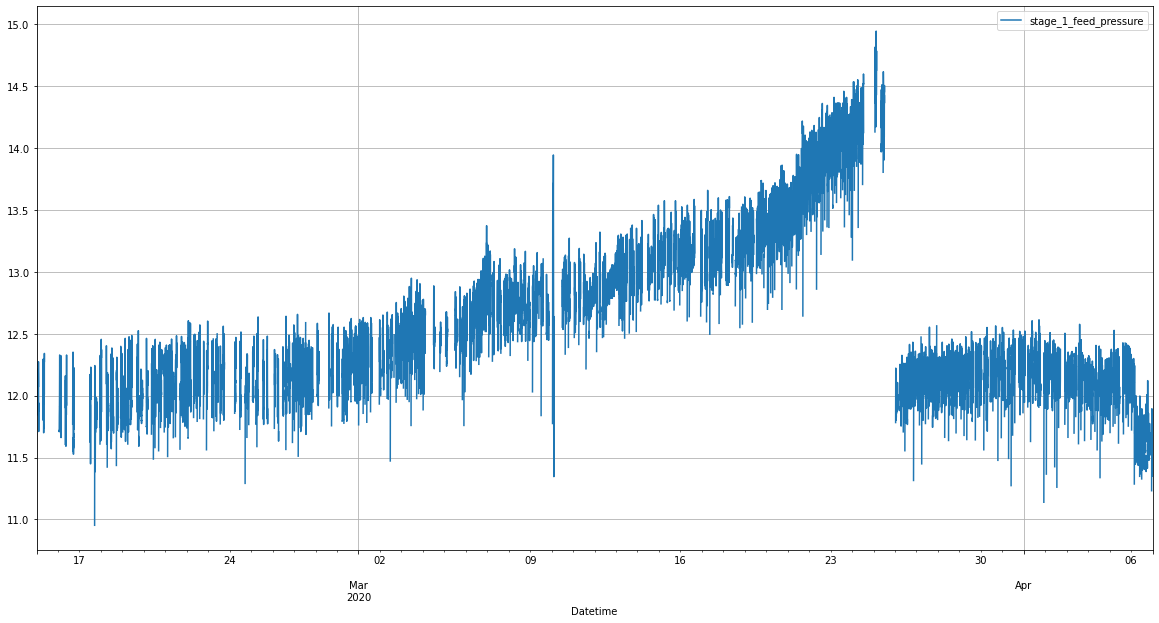

In [ ]:
features.loc['2020-02-15 00:00:00' : '2020-04-07 00:00:00', ['stage_1_feed_pressure']].plot(figsize=(20,10)).grid()

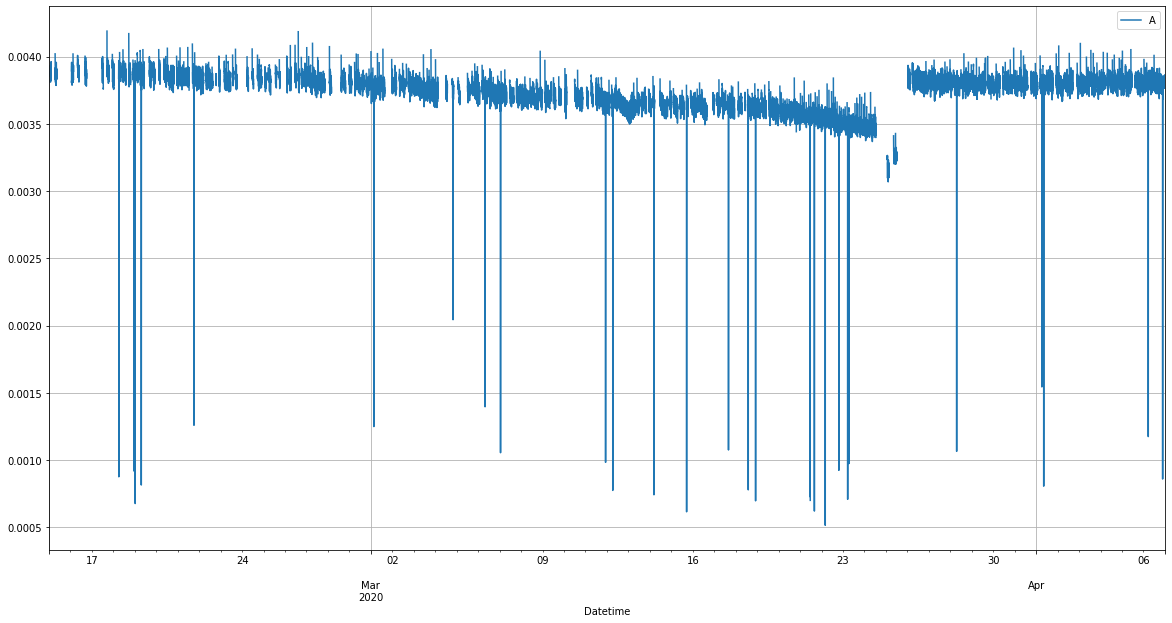

In [ ]:
features.loc['2020-02-15 00:00:00' : '2020-04-07 00:00:00', ['A']].plot(figsize=(20,10)).grid()

2020-02-15 00:00


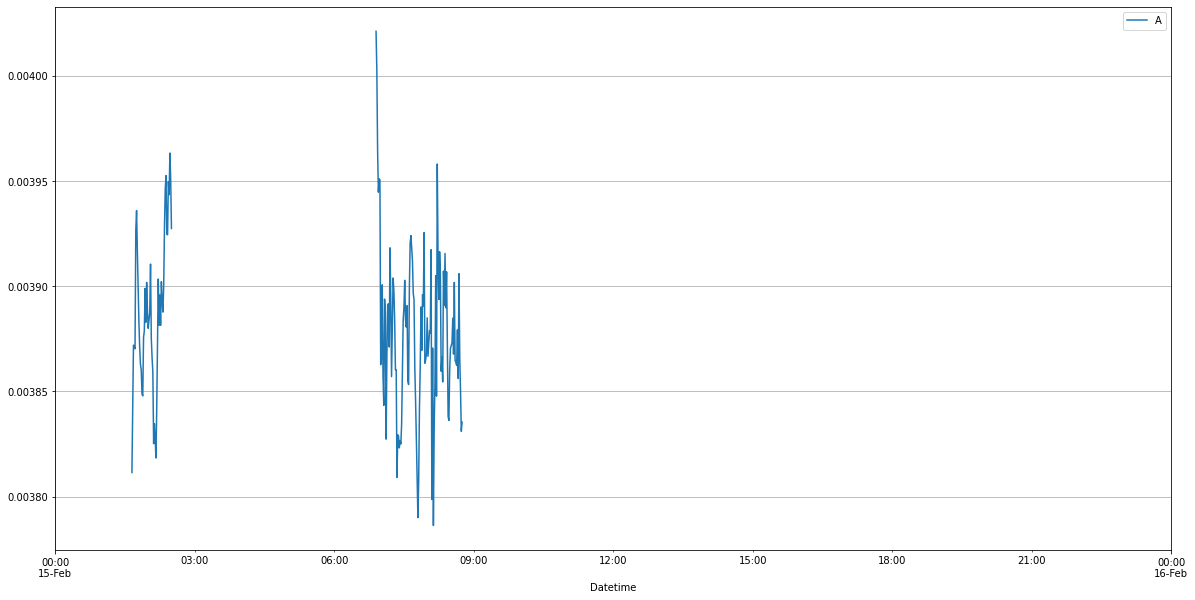

2020-02-16 00:00


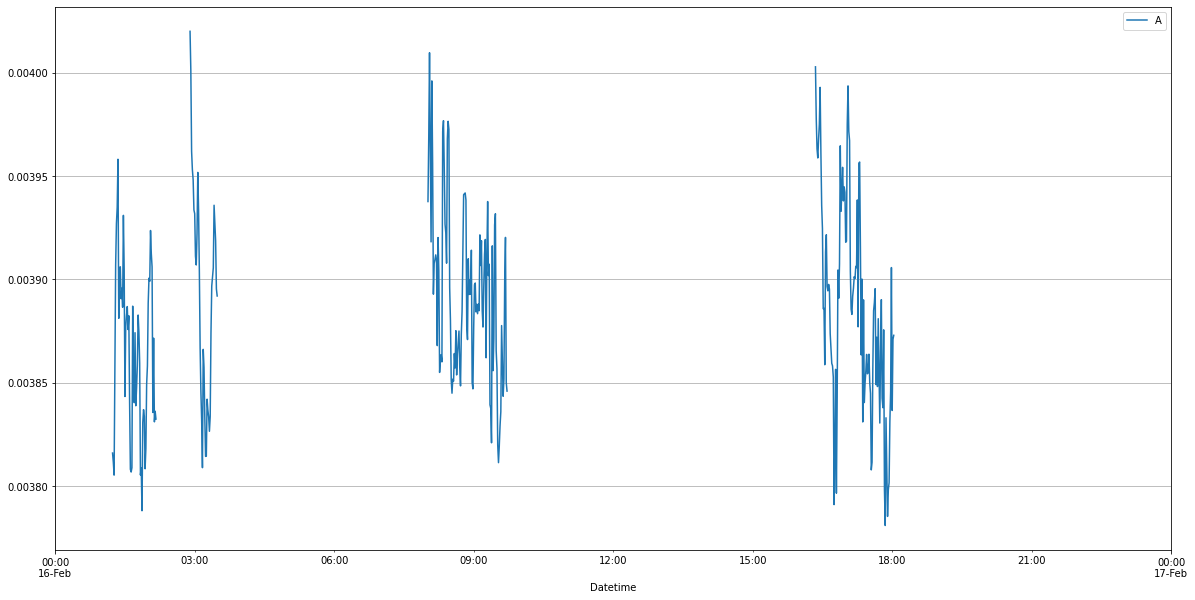

2020-02-17 00:00


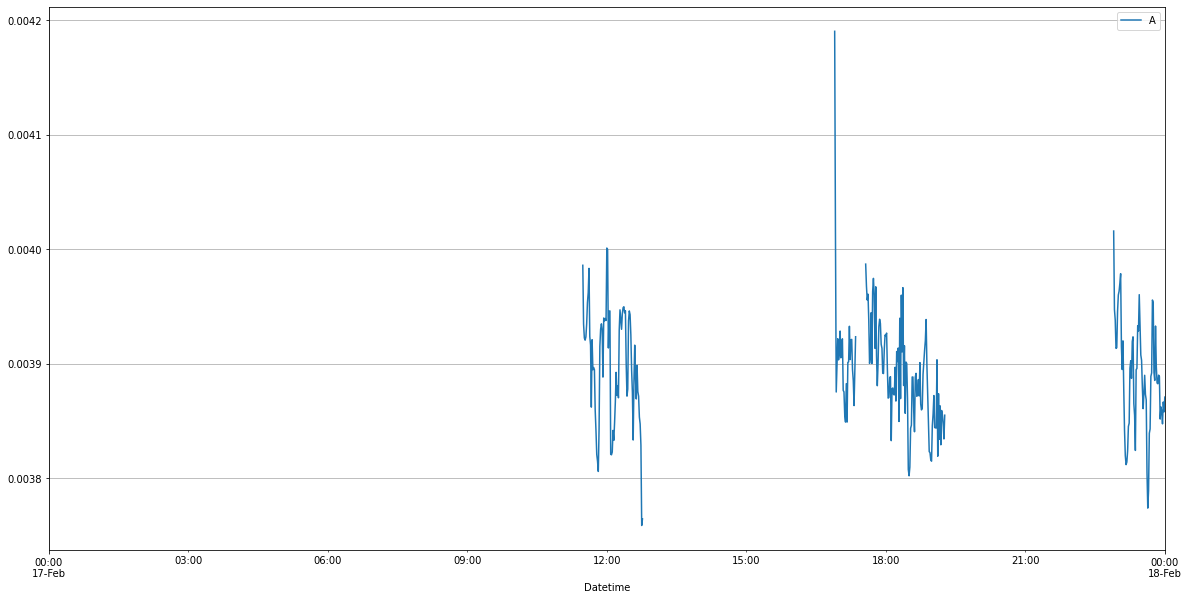

2020-02-18 00:00


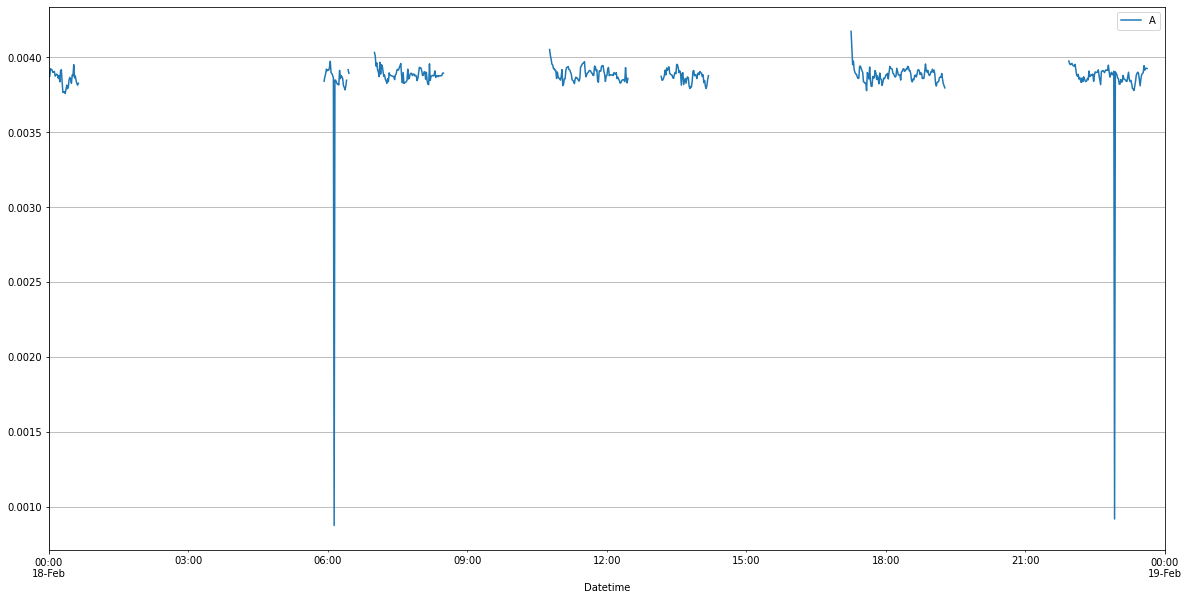

2020-02-19 00:00


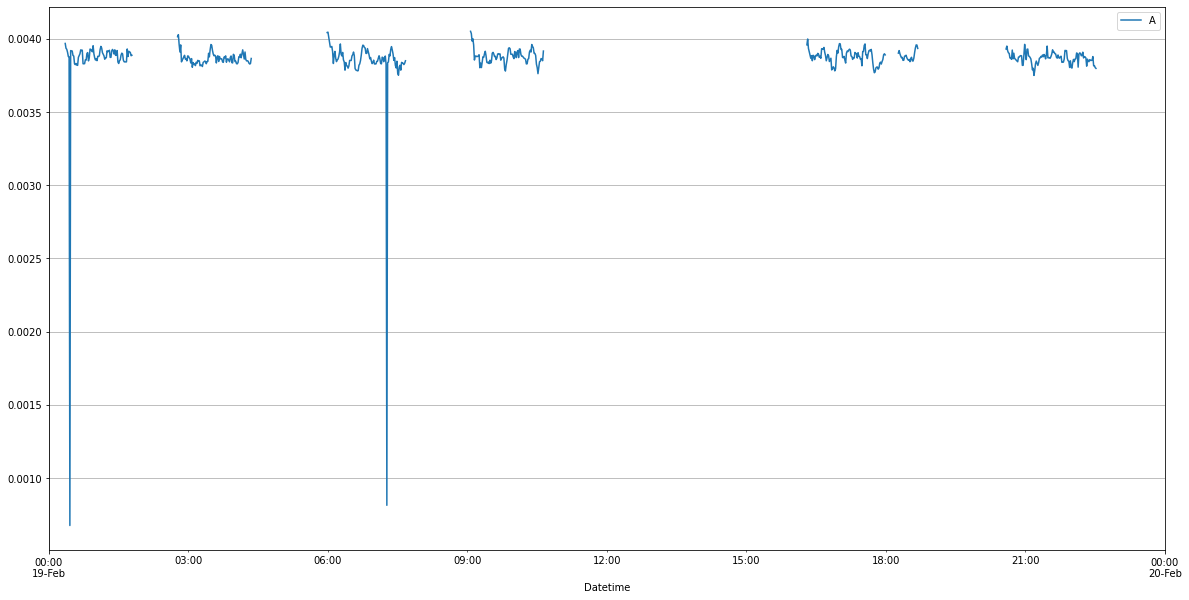

In [ ]:
#all dates graphs
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%d %H:%M') for dt in 
       datetime_range(datetime(2020, 2, 15, 0), datetime(2020, 2, 20, 0), 
       timedelta(minutes=1440))]

for i in dts:
    from_time = i
    print(from_time)
    to_time = datetime.strptime(i, '%Y-%m-%d %H:%M') + timedelta(minutes=1440)
    
        
    features.loc[from_time : to_time, ['A']].plot(figsize=(20,10)).grid()

    #plt.legend()
    #plt.savefig(picname)
    plt.show();

In [ ]:
# Multiple Linear Regression

# Time-series Forecasting models and Regression models works best when the number of missings values for the features are less. 
# But almost all the features have 71% of its data missing based on the tables above.

# hence trying to extract the part of data between a date range which has few missing values.

df2 = df.loc['2020-02-15 00:00:00' : '2020-04-07 00:00:00']

# The data has few missing values only in between the date range of Feb 15th 2021 - April 7th 2021 as shown in the table below

subset = df2[['feed_flow', 'feed_concentration', 'feed_temperature', 'salt_loading', 'recovery', 'salt_loading_since_replace', 'salt_loading_since_clean', 'feed_ph', 'feed_turbidity', 'stage_1_feed_pressure','A']]
details1, details2 = characteristics(subset)

# Displaying the features based on using correlation values of each input feature with respect to the target
details1.sort_values(by='corr with stage_1_feed_pressure', ascending=False, inplace = True)
details1.head(15)


,type,count,uniques,distincts,nulls,missing_ratio,skewness,kurtosis,corr with stage_1_feed_pressure
stage_1_feed_pressure,float64,38751,"[nan, 11.84475, 11.84992, 11.85509, 11.888705,...",1793,36130,48.249890,0.886140,0.143234,1.000000
salt_loading_since_clean,float64,41267,"[nan, 31.52913432131687, 31.52971795947116, 31...",36283,33614,44.889892,-0.391161,-1.508984,0.673609
feed_flow,float64,38751,"[nan, 159.462972, 159.859296, 160.398396, 160....",28358,36130,48.249890,-1.306654,8.959023,0.172166
salt_loading_since_replace,float64,38751,"[nan, 442.0544709384449, 442.05505457659933, 4...",38752,36130,48.249890,-0.201722,-1.071819,0.114791
feed_turbidity,float64,450,"[nan, 0.019375, 0.02, 0.023125, 0.021875, 0.02...",247,74431,99.399046,8.472137,84.567533,0.080483
salt_loading,float64,38751,"[nan, 0.035125706157300006, 0.03491087235696, ...",36995,36130,48.249890,-0.965207,2.891986,0.044225
feed_ph,float64,68467,"[7.898625, 7.881125, 7.879375, 7.863625, 7.888...",1983,6414,8.565591,16.207464,455.773398,0.000326
feed_concentration,float64,38751,"[nan, 220.275, 218.385, 209.7, 211.5, 212.445,...",1246,36130,48.249890,-0.923893,2.539820,-0.005347
recovery,float64,38751,"[nan, 0.7919969784584224, 0.7962883309582449, ...",30769,36130,48.249890,1.931290,46.691734,-0.038598
feed_temperature,float64,38751,"[nan, 16.354166666666668, 16.383680555555557, ...",913,36130,48.249890,-0.068116,6.634467,-0.300932


In [ ]:
details2.sort_values(by='corr with A', ascending=False, inplace = True)
details2.head(15)

,type,count,uniques,distincts,nulls,missing_ratio,skewness,kurtosis,corr with A
A,float64,38751,"[nan, 0.003811515835930373, 0.0038404540700154...",38730,36130,48.249890,-6.083308,110.824214,1.000000
recovery,float64,38751,"[nan, 0.7919969784584224, 0.7962883309582449, ...",30769,36130,48.249890,1.931290,46.691734,0.179437
feed_temperature,float64,38751,"[nan, 16.354166666666668, 16.383680555555557, ...",913,36130,48.249890,-0.068116,6.634467,0.101150
feed_ph,float64,68467,"[7.898625, 7.881125, 7.879375, 7.863625, 7.888...",1983,6414,8.565591,16.207464,455.773398,0.024923
feed_flow,float64,38751,"[nan, 159.462972, 159.859296, 160.398396, 160....",28358,36130,48.249890,-1.306654,8.959023,0.002210
salt_loading,float64,38751,"[nan, 0.035125706157300006, 0.03491087235696, ...",36995,36130,48.249890,-0.965207,2.891986,-0.029273
feed_concentration,float64,38751,"[nan, 220.275, 218.385, 209.7, 211.5, 212.445,...",1246,36130,48.249890,-0.923893,2.539820,-0.031709
feed_turbidity,float64,450,"[nan, 0.019375, 0.02, 0.023125, 0.021875, 0.02...",247,74431,99.399046,8.472137,84.567533,-0.075948
salt_loading_since_replace,float64,38751,"[nan, 442.0544709384449, 442.05505457659933, 4...",38752,36130,48.249890,-0.201722,-1.071819,-0.190868
salt_loading_since_clean,float64,41267,"[nan, 31.52913432131687, 31.52971795947116, 31...",36283,33614,44.889892,-0.391161,-1.508984,-0.477627


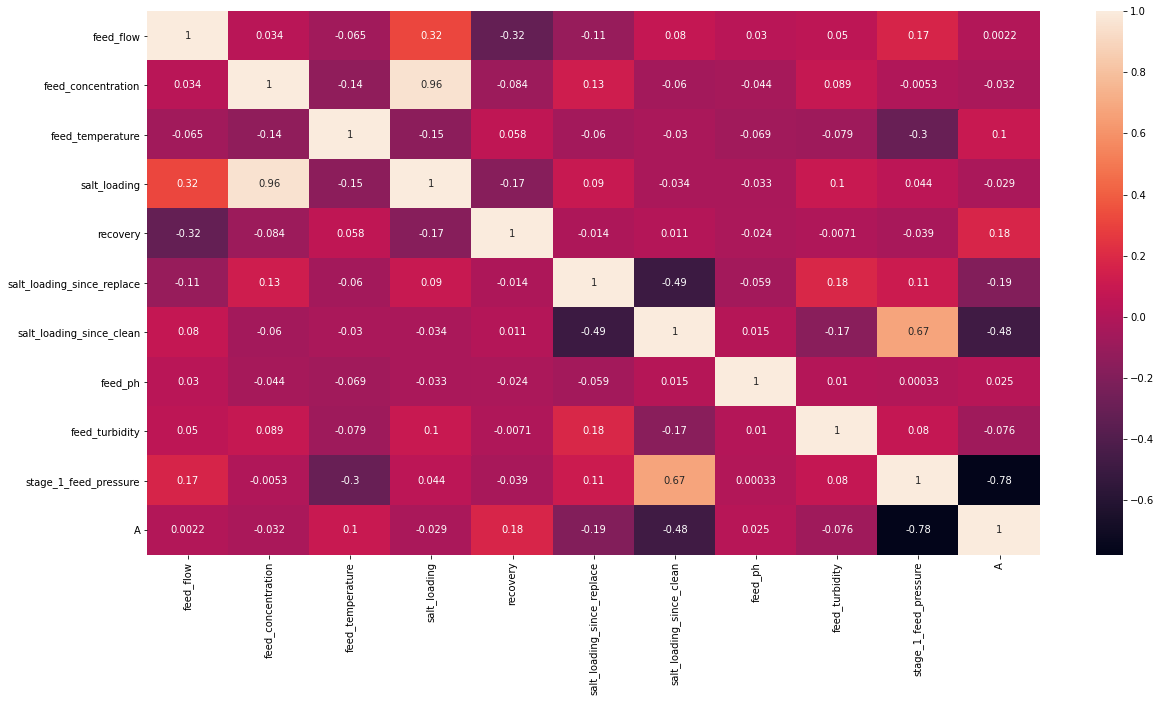

In [ ]:
# We will build a regression model for the subset of data extracted as per the above date range
# However the correlation between tthe features are totally different for this subset of points

#Correlation analysis between all the feature variables (when the datapoints from Feb 15 to March is considered)
plt.figure(figsize=(20,10))
sns.heatmap(subset.corr(), annot= True)
plt.show()

In [ ]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74881 entries, 2020-02-15 00:00:00+00:00 to 2020-04-07 00:00:00+00:00
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   feed_flow                   38751 non-null  float64
 1   feed_concentration          38751 non-null  float64
 2   feed_temperature            38751 non-null  float64
 3   salt_loading                38751 non-null  float64
 4   recovery                    38751 non-null  float64
 5   salt_loading_since_replace  38751 non-null  float64
 6   salt_loading_since_clean    41267 non-null  float64
 7   feed_ph                     68467 non-null  float64
 8   feed_turbidity              450 non-null    float64
 9   stage_1_feed_pressure       38751 non-null  float64
 10  A                           38751 non-null  float64
dtypes: float64(11)
memory usage: 6.9 MB


In [ ]:
subset.tail()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,feed_ph,feed_turbidity,stage_1_feed_pressure,A
Datetime,,,,,,,,,,,
2020-04-06 23:56:00+00:00,156.616128,225.720,16.631944,0.035351,0.806466,486.843006,8.639086,7.893375,NaN,11.52930,0.003856
2020-04-06 23:57:00+00:00,156.616128,226.440,16.586806,0.035464,0.806466,486.843596,8.639676,7.877625,NaN,11.56292,0.003849
2020-04-06 23:58:00+00:00,158.193432,227.115,16.586806,0.035928,0.802806,486.844191,8.640271,7.877625,NaN,11.63014,0.003838
2020-04-06 23:59:00+00:00,157.557132,227.430,16.572917,0.035833,0.802010,486.844789,8.640869,7.877625,0.014687,11.63014,0.003819
2020-04-07 00:00:00+00:00,156.923136,227.610,16.572917,0.035717,0.809305,486.845385,8.641465,7.877625,NaN,11.63014,0.003844


In [ ]:
subset.tail()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,feed_ph,feed_turbidity,stage_1_feed_pressure,A
Datetime,,,,,,,,,,,
2020-04-06 23:56:00+00:00,156.616128,225.720,16.631944,0.035351,0.806466,486.843006,8.639086,7.893375,NaN,11.52930,0.003856
2020-04-06 23:57:00+00:00,156.616128,226.440,16.586806,0.035464,0.806466,486.843596,8.639676,7.877625,NaN,11.56292,0.003849
2020-04-06 23:58:00+00:00,158.193432,227.115,16.586806,0.035928,0.802806,486.844191,8.640271,7.877625,NaN,11.63014,0.003838
2020-04-06 23:59:00+00:00,157.557132,227.430,16.572917,0.035833,0.802010,486.844789,8.640869,7.877625,0.014687,11.63014,0.003819
2020-04-07 00:00:00+00:00,156.923136,227.610,16.572917,0.035717,0.809305,486.845385,8.641465,7.877625,NaN,11.63014,0.003844


In [ ]:
# So we will use all the features from subset dataframe for building the Multiple Linear Regression model

subset['feed_flow'] = subset['feed_flow'].fillna(0)
#subset['feed_flow'].fillna(0)
subset['feed_concentration'] = subset['feed_concentration'].fillna(0)
subset['feed_temperature'] = subset['feed_temperature'].fillna(0)
subset['salt_loading'] = subset['salt_loading'].fillna(0)
subset['recovery'] = subset['recovery'].fillna(0)
subset['feed_ph'] = subset['feed_ph'].fillna(0)
subset['feed_turbidity'] = subset['feed_turbidity'].fillna(0)
subset['A'] = subset['A'].fillna(0)
subset['stage_1_feed_pressure'] = subset['stage_1_feed_pressure'].fillna(0)

subset['recovery'] = subset['recovery'].fillna(0)
subset['salt_loading_since_clean'] = subset['salt_loading_since_clean'].fillna(0)
subset['salt_loading_since_replace'] = subset['salt_loading_since_replace'].fillna(0)


In [ ]:
subset.tail()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,salt_loading_since_replace,salt_loading_since_clean,feed_ph,feed_turbidity,stage_1_feed_pressure,A
Datetime,,,,,,,,,,,
2020-04-06 23:56:00+00:00,156.616128,225.720,16.631944,0.035351,0.806466,486.843006,8.639086,7.893375,0.000000,11.52930,0.003856
2020-04-06 23:57:00+00:00,156.616128,226.440,16.586806,0.035464,0.806466,486.843596,8.639676,7.877625,0.000000,11.56292,0.003849
2020-04-06 23:58:00+00:00,158.193432,227.115,16.586806,0.035928,0.802806,486.844191,8.640271,7.877625,0.000000,11.63014,0.003838
2020-04-06 23:59:00+00:00,157.557132,227.430,16.572917,0.035833,0.802010,486.844789,8.640869,7.877625,0.014687,11.63014,0.003819
2020-04-07 00:00:00+00:00,156.923136,227.610,16.572917,0.035717,0.809305,486.845385,8.641465,7.877625,0.000000,11.63014,0.003844


In [ ]:


def multiple_linear_regression(X_train, Y_train, X_test, Y_test):
    #Creating a multiple linear regrssion model using the 7 input features. 
    #The linear regression method will automatically intepret that this method call/invoke is for building multiple regression model based on the number of input features passed.
    #The model will automatically select the best features based on the p-values which will statiscally add signifance to the model. 
    #Features with p-values higher than the significance level will be discarded.

    model = LinearRegression()

    #Fit the model using the training data
    model.fit(X_train, Y_train)

    #get the predictions for the input test data
    Y_pred = model.predict(X_test)

    return model, Y_pred

def evaluate_mlr(Y_test, Y_pred):
    
    #Using R2 to determine the goodness of the model
    print("Model Accuracy:", r2_score(Y_test, Y_pred)*100)

In [ ]:


#reset the datetime index and removing salt loading since clean & replace features. Using General features

subset = subset.reset_index(drop=True)
subset = subset.drop(['salt_loading_since_clean','salt_loading_since_replace'], axis=1)



In [ ]:
subset.head()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,feed_ph,feed_turbidity,stage_1_feed_pressure,A
0,0.0,0.0,0.0,0.0,0.0,7.898625,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,7.881125,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,7.879375,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,7.879375,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,7.863625,0.0,0.0,0.0


In [ ]:


#First 6 features/input attributes are stored in X variable 
X = subset.iloc[ : , 0:7 ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 7:8 ]

#Splitting the data into training and testing data in 60:40 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)

Model Accuracy: 99.52586033824987


In [ ]:
import statsmodels.api as sm

#Backward elimination of variables
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)

                                  OLS Regression Results                                  
Dep. Variable:     stage_1_feed_pressure   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          4.704e+06
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                           11:05:23   Log-Likelihood:                         -43398.
No. Observations:                  74881   AIC:                                  8.681e+04
Df Residuals:                      74874   BIC:                                  8.687e+04
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
# Removing feed_ph which has highest p-value of 0.800
X = X = subset.iloc[ : , [0,1,2,3,4,6] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)

                                  OLS Regression Results                                  
Dep. Variable:     stage_1_feed_pressure   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          5.489e+06
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                           11:06:23   Log-Likelihood:                         -43398.
No. Observations:                  74881   AIC:                                  8.681e+04
Df Residuals:                      74875   BIC:                                  8.686e+04
Df Model:                              6                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
# Removing feed_turbidity which has highest p-value of 0.486
X = X = subset.iloc[ : , [0,1,2,3,4] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)

                                  OLS Regression Results                                  
Dep. Variable:     stage_1_feed_pressure   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          6.586e+06
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                           11:06:49   Log-Likelihood:                         -43398.
No. Observations:                  74881   AIC:                                  8.681e+04
Df Residuals:                      74876   BIC:                                  8.685e+04
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
# Removing variable to remove multi-collinearity such as 'salt_loading' since it is calculated using feed_flow and feed_concentration variables, Removed 'recovery as well. 
# Based on the results below, the multi-collinearoty warning is gone after removing the redundant features.
X = X = subset.iloc[ : , [0,1,2] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)

                                  OLS Regression Results                                  
Dep. Variable:     stage_1_feed_pressure   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          1.068e+07
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                           11:10:29   Log-Likelihood:                         -44415.
No. Observations:                  74881   AIC:                                  8.884e+04
Df Residuals:                      74878   BIC:                                  8.886e+04
Df Model:                              3                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
# Checking perfromance of MLR model usign only feed_flow, feed_concentration, feed_temperature as the input features and stage_1_feed_pressure' as response variable (for the whole dataset)


#First 6 features/input attributes are stored in X variable and the last 'price' response varaible is stored in Y 
X = subset.iloc[ : , [0,1,2] ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 7:8 ]

#Splitting the data into training and testing data in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)

#Displaying the accuracy, interceopt and co-efficients for the MLR model
print(mlr_model.intercept_, mlr_model.coef_)

# As per results the equation is: Y = (0.0008307)  +  (1.19382725e-01)*feed_flow + (-2.36482365e-04)*feed_concentration +  (-4.08832098e-01)*feed_temperature

Model Accuracy: 99.51206598804386
[0.0008307] [[ 1.19382725e-01 -2.36482365e-04 -4.08832098e-01]]


### Doing the similar steps as above considering the target variable as 'A'

In [ ]:


#First 7 features/input attributes are stored in X variable and the last 'A' response varaible is stored in Y 
X = subset.iloc[ : , 0:7 ]

#A as response variable stored in Y
Y = subset.iloc[ : , 8: ]

#Splitting the data into training and testing data in 60:40 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)


Model Accuracy: 99.69129674205614


In [ ]:
# Backward Elimination of features that doesn't have impact on the respons evariable 'A'
X = X = subset.iloc[ : , [0,1,2] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)


# Removed feed_ph, feed_turbidity who p-values were high.
# Removed variable to remove multi-collinearity such as 'salt_loading' since it is calculated using feed_flow and feed_concentration variables, Removed 'recovery as well. 
# Based on the results below, the multi-collinearoty warning is gone after removing the redundant features.


                                 OLS Regression Results                                
Dep. Variable:                      A   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.671e+07
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:30:33   Log-Likelihood:                      5.8068e+05
No. Observations:               74881   AIC:                                 -1.161e+06
Df Residuals:                   74878   BIC:                                 -1.161e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Based on the above analysis using statsmodels, both the response variables - 'A' & 'Stage1_feed_pressure' are highly impacted by three main input features: feed_flow, feed_concentration and feed_temperature.

### Instead of considering the whole dataset, let us extract a portion of data from 15th Feb 2021 to April 7th 2021

In [ ]:
# Data between Feb 15th - April 7th 2021 is used since most of the input sample data is captured as function of time. 
subset = df2[['feed_flow', 'feed_concentration', 'feed_temperature', 'salt_loading', 'recovery', 'feed_ph', 'feed_turbidity', 'stage_1_feed_pressure','A']]

subset['feed_flow'] = subset['feed_flow'].fillna(0)
subset['feed_concentration'] = subset['feed_concentration'].fillna(0)
subset['feed_temperature'] = subset['feed_temperature'].fillna(0)
subset['salt_loading'] = subset['salt_loading'].fillna(0)
subset['recovery'] = subset['recovery'].fillna(0)
subset['feed_ph'] = subset['feed_ph'].fillna(0)
subset['feed_turbidity'] = subset['feed_turbidity'].fillna(0)
subset['A'] = subset['A'].fillna(0)
subset['stage_1_feed_pressure'] = subset['stage_1_feed_pressure'].fillna(0)

In [ ]:
subset.head()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,feed_ph,feed_turbidity,stage_1_feed_pressure,A
Datetime,,,,,,,,,
2020-02-15 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,7.898625,0.0,0.0,0.0
2020-02-15 00:01:00+00:00,0.0,0.0,0.0,0.0,0.0,7.881125,0.0,0.0,0.0
2020-02-15 00:02:00+00:00,0.0,0.0,0.0,0.0,0.0,7.879375,0.0,0.0,0.0
2020-02-15 00:03:00+00:00,0.0,0.0,0.0,0.0,0.0,7.879375,0.0,0.0,0.0
2020-02-15 00:04:00+00:00,0.0,0.0,0.0,0.0,0.0,7.863625,0.0,0.0,0.0


In [ ]:
#reset the datetime index 
subset = subset.reset_index(drop=True)

In [ ]:


#First 7 features/input attributes are stored in X variable 
X = subset.iloc[ : , 0:7 ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 7:8 ]

#Splitting the data into training and testing data in 60:40 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)

Model Accuracy: 99.52586033824987


In [ ]:
# The accuracy for this portion of data is same as the accuracy for the whole dataset


In [ ]:
# Backward Elimination of features that doesn't have impact on the respons evariable 'A'
X = X = subset.iloc[ : , [0,1,2] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)


# Removed feed_ph, feed_turbidity who p-values were high.
# Removed variable to remove multi-collinearity such as 'salt_loading' since it is calculated using feed_flow and feed_concentration variables, Removed 'recovery as well. 
# Based on the results below, the multi-collinearoty warning is gone after removing the redundant features.


                                  OLS Regression Results                                  
Dep. Variable:     stage_1_feed_pressure   R-squared (uncentered):                   0.998
Model:                               OLS   Adj. R-squared (uncentered):              0.998
Method:                    Least Squares   F-statistic:                          1.068e+07
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                           11:37:58   Log-Likelihood:                         -44415.
No. Observations:                  74881   AIC:                                  8.884e+04
Df Residuals:                      74878   BIC:                                  8.886e+04
Df Model:                              3                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
# let us check for response variable 'A'



#First 7 features/input attributes are stored in X variable 
X = subset.iloc[ : , 0:7 ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 8: ]

#Splitting the data into training and testing data in 60:40 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)


Model Accuracy: 99.69129674205614


In [ ]:

# Backward Elimination of features that doesn't have impact on the respons evariable 'A'
X = X = subset.iloc[ : , [0,1,2] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)


# Removed feed_ph, feed_turbidity who p-values were high.
# Removed variable to remove multi-collinearity such as 'salt_loading' since it is calculated using feed_flow and feed_concentration variables, Removed 'recovery as well. 
# Based on the results below, the multi-collinearoty warning is gone after removing the redundant features.


                                 OLS Regression Results                                
Dep. Variable:                      A   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.671e+07
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:39:45   Log-Likelihood:                      5.8068e+05
No. Observations:               74881   AIC:                                 -1.161e+06
Df Residuals:                   74878   BIC:                                 -1.161e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### Based on the above results for the data extracted between 15th Feb and 7th April 2021, the important features for both the response variables are : feed_flow, feed_concentration, feed_temperature

### Trying above steps by imputing the missing values with mean values for each feature respectively rather than replacing with '0'. Data extracted between 15th Feb - 7th April 2021

In [ ]:
#Imputing missing values of each feature with its mean values

subset = df2[['feed_flow', 'feed_concentration', 'feed_temperature', 'salt_loading', 'recovery', 'feed_ph', 'feed_turbidity', 'stage_1_feed_pressure','A']]

subset['feed_flow'] = subset['feed_flow'].fillna(subset['feed_flow'].mean())
subset['feed_concentration'] = subset['feed_concentration'].fillna(subset['feed_concentration'].mean())
subset['feed_temperature'] = subset['feed_temperature'].fillna(subset['feed_temperature'].mean())
subset['salt_loading'] = subset['salt_loading'].fillna(subset['salt_loading'].mean())
subset['recovery'] = subset['recovery'].fillna(subset['recovery'].mean())
subset['feed_ph'] = subset['feed_ph'].fillna(subset['feed_ph'].mean())
subset['feed_turbidity'] = subset['feed_turbidity'].fillna(subset['feed_turbidity'].mean())
subset['A'] = subset['A'].fillna(subset['A'].mean())
subset['stage_1_feed_pressure'] = subset['stage_1_feed_pressure'].fillna(subset['stage_1_feed_pressure'].mean())

subset.head()

,feed_flow,feed_concentration,feed_temperature,salt_loading,recovery,feed_ph,feed_turbidity,stage_1_feed_pressure,A
Datetime,,,,,,,,,
2020-02-15 00:00:00+00:00,161.7558,223.349679,16.318117,0.036128,0.800683,7.898625,0.071797,12.59152,0.003732
2020-02-15 00:01:00+00:00,161.7558,223.349679,16.318117,0.036128,0.800683,7.881125,0.071797,12.59152,0.003732
2020-02-15 00:02:00+00:00,161.7558,223.349679,16.318117,0.036128,0.800683,7.879375,0.071797,12.59152,0.003732
2020-02-15 00:03:00+00:00,161.7558,223.349679,16.318117,0.036128,0.800683,7.879375,0.071797,12.59152,0.003732
2020-02-15 00:04:00+00:00,161.7558,223.349679,16.318117,0.036128,0.800683,7.863625,0.071797,12.59152,0.003732


In [ ]:
#reset the datetime index 
subset = subset.reset_index(drop=True)

In [ ]:


#First 7 features/input attributes are stored in X variable 
X = subset.iloc[ : , 0:7 ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 7:8 ]

#Splitting the data into training and testing data in 60:40 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)

Model Accuracy: 11.498745686357603


In [ ]:
#The R2 score is 11.49 which is very low than previous results for the datasets where we imputed the missing values with '0'

In [ ]:

# Backward Elimination of features that doesn't have impact on the response variable 'Stage_1_feed_pressure'
X = X = subset.iloc[ : , [0,1,2] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)


# Removed feed_turbidity - p-values were high.
# Removed variable to remove multi-collinearity such as 'salt_loading' since it is calculated using feed_flow and feed_concentration variables, Removed 'recovery as well. 
# Based on the results below, the multi-collinearoty warning is gone after removing the redundant features.


                                  OLS Regression Results                                  
Dep. Variable:     stage_1_feed_pressure   R-squared (uncentered):                   0.999
Model:                               OLS   Adj. R-squared (uncentered):              0.999
Method:                    Least Squares   F-statistic:                          2.064e+07
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                           12:18:37   Log-Likelihood:                         -44415.
No. Observations:                  74881   AIC:                                  8.884e+04
Df Residuals:                      74878   BIC:                                  8.886e+04
Df Model:                              3                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [ ]:
# let us check for response variable 'A'

#First 7 features/input attributes are stored in X variable 
X = subset.iloc[ : , 0:7 ]

#Stage_1_feed_pressure as response variable stored in Y
Y = subset.iloc[ : , 8: ]

#Splitting the data into training and testing data in 60:40 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)


mlr_model, Y_pred = multiple_linear_regression(X_train, Y_train, X_test, Y_test)
evaluate_mlr(Y_test, Y_pred)


Model Accuracy: 4.176915984116791


In [ ]:

# Backward Elimination of features that doesn't have impact on the respons evariable 'A'
X = X = subset.iloc[ : , [0,1,2] ]
model_ols = sm.OLS(Y, X).fit()
predictions = model_ols.predict(X) 
 
print_model_ols = model_ols.summary()
print(print_model_ols)


# Removed feed_turbidity - p-values were high.
# Removed variable to remove multi-collinearity such as 'salt_loading' since it is calculated using feed_flow and feed_concentration variables, Removed 'recovery as well. 
# Based on the results below, the multi-collinearoty warning is gone after removing the redundant features.


                                 OLS Regression Results                                
Dep. Variable:                      A   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.230e+07
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:20:22   Log-Likelihood:                      5.8068e+05
No. Observations:               74881   AIC:                                 -1.161e+06
Df Residuals:                   74878   BIC:                                 -1.161e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
# The MLR results were better when the missing values were imputer with '0' rather than the mean values of the features.